<a href="https://colab.research.google.com/github/JuanM-GG/modelos-tesis/blob/main/modelo_lote_alimentado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Título: Modelo biorreactor lote-alimentado

Autor: Juan Manuel Gutiérrez García

Afiliación: Instituto Tecnológico de Morelia 

Fecha:  Enero 2021

# Descripción del proceso 

En la siguiente libro describimos el modelado y la optimización de un biorreactor tipo lote-alimentado. En este biorreactor se tiene un flujo de alimentación $F_{in}$, pero no un flujo de salida. Se considera que en la alimentación se introduce unicamente sustrato $s$. En el interior del biorreactor ocurren reacciones que dan lugar a la formación de biomasa $x$ y producto $p$. En el proceso nos interesa maximizar la cantidad de biomasa generada al final de la fermentación. Para lograr esto se estudian cuatro estrategias de flujo de alimentación al biorreactor para determinar el valor de $F_{in}$ que nos permite optimizar el proceso. en particular investigamos  

1. Optimización con flujo de alimentación constante sin restricciones en el volumen 
2. Optimización con flujo de alimentación variable sin restricciones en el volumen 
1. Optimización con flujo de alimentación constante con restricciones en el volumen 
1. Optimización con flujo de alimentación variable con restricciones en el volumen 

 

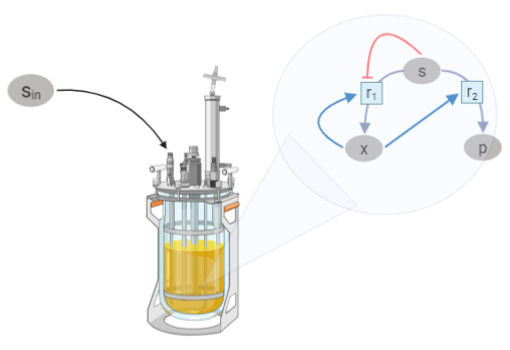

Figura 1. Esquema de un biorreactor tipo lote-alimentado donde se alimenta un flujo con una concentración de sustrato $s_{in}$ y ocurre una inhibición del crecimiento por parte del sustrato 

# Suposiciones 

1. La densidad es constante en todo el biorreactor 

2. La concentración de las especies es homogénea en todo el biorreactor 

3. Los parámetros cinéticos permanecen constantes durante la fermentación (esta es una suposición factible siempre y cuando la temperatura no cambie mucho)

4. Solo existe un tipo de sustrato en el biorreactor del cual las células se pueden alimentar

5. Solo existe un tipo de microorganismo en el biorreactor 

# Modelado de ecuaciones

El modelo dinámico se desarrolla escribiendo un balance de materia total, para la biomasa (células), el sustrato (fuente de alimentación para las células) y el producto (metabolito generado). Consideramos que la biomasa crece alimentándose del sustrato.

### Balance de materia total 

$$acumulacion\ de\ biomasa\ =\ entrada\ por\ flujo\ -\ salida\ por\ flujo$$

<a id='equation-la-se2'></a>
$$
\frac{d(\rho V)}{dt} = F_{in}\rho \tag{1}
$$ 

### Balance de materia para la biomasa 

$$acumulacion\ de\ biomasa\ =\ entrada\ por\ flujo\ -\ salida\ por\ flujo\ +\ generación$$

<a id='equation-la-se2'></a>
$$
\frac{d(xV)}{dt} = V r_x \tag{2}
$$

### Balance de materia para el producto 

$$acumulacion\ de\ producto\ =\ entrada\ por\ flujo\ -\ salida\ por\ flujo\ +\ generación$$

<a id='equation-la-se2'></a>
$$
\frac{d(pV)}{dt} = V r_p \tag{3}
$$

### Balance de materia para el sustrato 

$$acumulacion\ de\ sustrato\ =\ entrada\ por\ flujo\ -\ salida\ por\ flujo\ -\ consumo$$

<a id='equation-la-se2'></a>
$$ 
\frac{d(sV)}{dt} = F_{in} s_f - V r_s \tag{4}
$$


En las ecuaciones anteriores consideramos que no hay biomasa ni producto en el flujo de entrada y que no se existe un flujo en la salida

## Tasa de crecimiento

La velocidad de crecimiento de biomasa, $r_x$, se expresa comúnmente como

$$r_x = \mu(s) x$$
Donde $\mu(s)$ es la tasa de crecimiento de biomasa ($tiempo^{-1}$) y suele ser una función del sustrato. Existen diversas expresiones para representar esta función. Algunas de ellas consideran efectos de inhibición por sustrato o por producto. 

### Modelo con inhibición por sustrato

En este caso usamos el modelo de inhibición por sustrato, el cual describe la tasa específica de crecimeinto como la siguiente función no monótona de la concentración de sustrato 
<a id='equation-la-se2'></a>
$$
\mu(s) = \frac{\mu_{max} s}{k_s + s + k_i s^2} \tag{5}
$$

## Rendimientos

Para relacionar la velocidad de crecimiento de biomasa, $r_x$, con las velocidades de consumo de sustrato, $r_s$, y generación de producto $r_p$, se emplean los rendimientos biomasa-sustrato y producto-biomasa, respectivamente. Estos rendimientos se definen como

Rendimiento biomasa-sustrato

$$Y_{xs} = \frac{r_x}{r_s}$$
Rendimiento producto-biomasa

$$Y_{px} = \frac{r_p}{r_x}$$
Donde $Y_{xs}$ y $Y_{px}$ son constantes.



Considerando lo anterior, reescribimos las ecuaciones (1)-(4) para obtener el sistema de ecuaciones diferenciales que describen el proceso

$$
\begin{aligned}
\frac{dV}{dt} &= F_{in} \\
\frac{dx}{dt} &= r_x - \frac{F_{in}}{V} x \\
\frac{ds}{dt} &= \frac{F_{in}}{V} (s_f - s) -\frac{1}{Y_{xs}}r_x \\
\frac{dp}{dt} &= Y_{px}r_x - \frac{F_{in}}{V} p
\end{aligned}
$$

Siendo 

$$r_x = \mu_{max} \left( \frac{s}{k_s + s + k_i s^2} \right) x $$

# Análisis de la tasa de crecimiento $\mu(s)$

In [ ]:
# cargar librerias 
install.packages("deSolve")
library(deSolve)
install.packages("ggplot2")
library(ggplot2)
install.packages("GA")
library(GA)

In [2]:
# ecuación de inhibición por sustrato  
subinhib <- function(s) {

  mu = mu_max*s/(ks + s + ki*s^2)

  return(mu)
}

In [3]:
# establecer parámetros
mu_max <- 0.53 # h^-1
ks <- 0.12 # g/L
ki <- 0.4545 # g/L
sf <- 4.0 # g/L

In [4]:
s <- seq(0,5,len=100)
mu <- subinhib(s)
data <- data.frame(s = s, mu = mu)

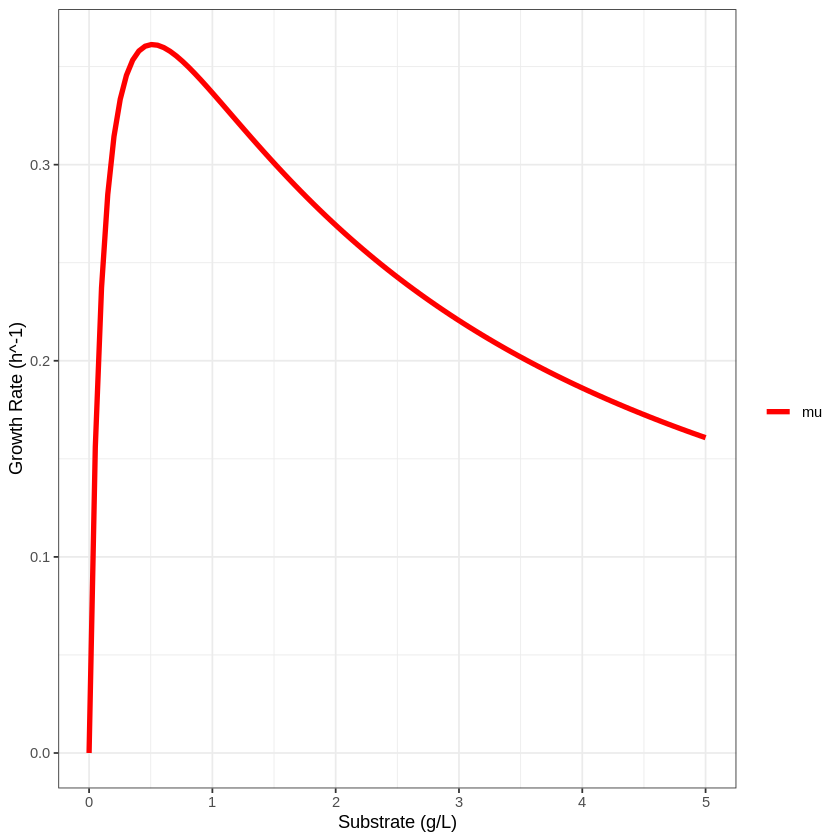

In [5]:
ggplot(data,aes(s)) +
  geom_line(aes(y=mu, color = "mu"), lwd = 1.5) +
  scale_color_manual("", breaks = c("mu"),
                          values = c("red")) +
  xlab("Substrate (g/L)") +
  ylab("Growth Rate (h^-1)") +
  theme_bw()

Figura 2. Tasa epecífica de crecimiento como función de la concentración de sustrato. Se observa como incrementa el valor de la tasa de crecimiento conforme la concentración de sustrato aumenta hasta alcanzar un máximo. Después de alcanzar la máxima tasa de crecimiento los efectos de ihnibición del sustrato ocasionan una disminución en la tasa de crecimiento 

# Red para describir el proceso 

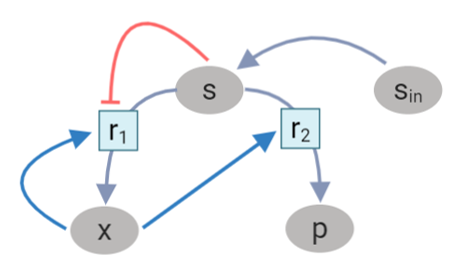

Figura 2. Red del proceso donde se observan las "reacciones" así como las especies que intervienen en estas reacciones y su efecto sobre las reacciones

En la Fig.2 se observa que para describir el presente proceso se consideran solamente dos reacciones, la reacción $r_1$ da lugar a la generación de biomasa a partir del sustrato, mientras que la reacción $r_2$ da lugar a la generación de producto a partir de sustrato. También se observa que la biomasa ($x$) tiene un efecto positivo sobre ambas reacciones mientras que el sustrato tiene un efecto negativo sobre la reacción $r_1$. Por otro lado es posible observar una entrada de sustrato $s_{in}$ al sistema. Esta entrada puede ser ajustada mediante la concentración de sustrato en la entrada y el flujo de alimentación. 


# Modelo sin restricción de volumen 

## Análisis con $F_{in}$ constante

In [142]:
# establecer modelo 
model1 <- function(times, state, parms) {
        with(as.list(c(state,parms)), {
                
                # velocidad de crecimiento de biomasa
                rg = mu_max*s/(ks + s + ki*s^2)*x
                
                # velocidad de consumo de sustrato
                rs = (1/Yxs)*rg

                # velocidad de generación de producto
                rp = Ypx*rg
                
                # balance de material global 
                dVdt = Fin 
                
                # balance de materia para sustrato
                dsdt = Fin/V*(sf - s) - rs
                
                # balance de materia para biomasa
                dxdt = - Fin/V*x + rg

                # balance de materia para el producto
                dpdt = - Fin/V*p + rp
                
                return(list(c(dVdt, dsdt, dxdt, dpdt), Fin = Fin))
        })
}

A pesar que las ecuaciones para biomasa, producto y sustrato son exactamente iguales que en el caso del reactor continuo, no se presenta un equilibrio porque el volumen siempre está aumentando

Empezamos por estudiar un proceso con los siguientes parámetros 

|parámetros cinético | parámetro de operación | 
|:---:|:---:|
| $\mu_{max} = 1.2\ h^{-1}$ | $s_f = 40\ g/L$|
| $k_{s} = 280\ g/L$ | $F_{in} = 0.5\ L/h$|
| $k_{i} = 0.6\ L/g$ | |
| $Y_{xs} = 0.2 $ | |
| $Y_{px} = 4 $ | |

In [147]:
# establecer valor de parámetros 
p <- c(mu_max = 1.2, ks = 280, Yxs = 0.2, Ypx = 4, sf = 40, Fin = 0.5, ki = 0.6)

La siguientes consiciones iniciales representan valores comunes de estas variables al inicio de un proceso se fermentación 

In [148]:
# condiciones iniciales
s <- c(V = 10.0, s = 10, x = 0.05, p = 0)

El tiempo de la fermentación que se establece también es un periodo de tiempo común para esta clase de procesos 

In [149]:
# timepo de integración 
times <- seq(0,100,len=100)

In [150]:
# resolver EDOs
out <- ode(y = s, times = times, func = model1, parms = p, method = "rk4")

In [151]:
# guardar resultados 
out <- as.data.frame(out)

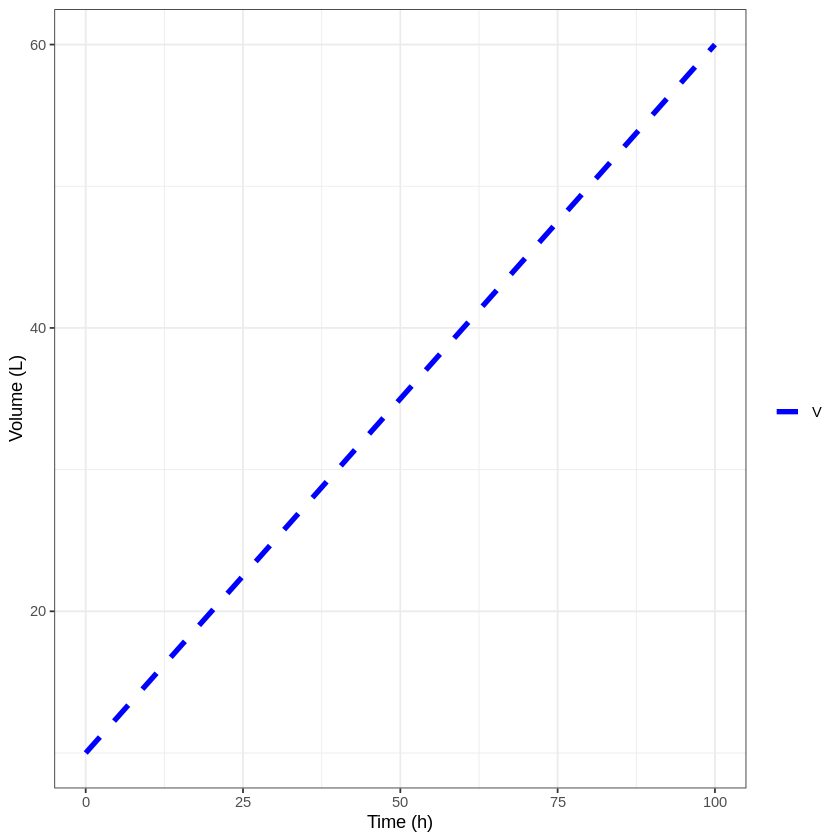

In [152]:
# mostrar resultados 
ggplot(out, aes(time)) +
        geom_line(aes(y = V, color = "V"),  lty = 2, lwd = 1.5) +
        scale_color_manual("", breaks = c("V"), values = c("blue")) +
        xlab("Time (h)") +
        ylab("Volume (L)") +
        theme_bw()

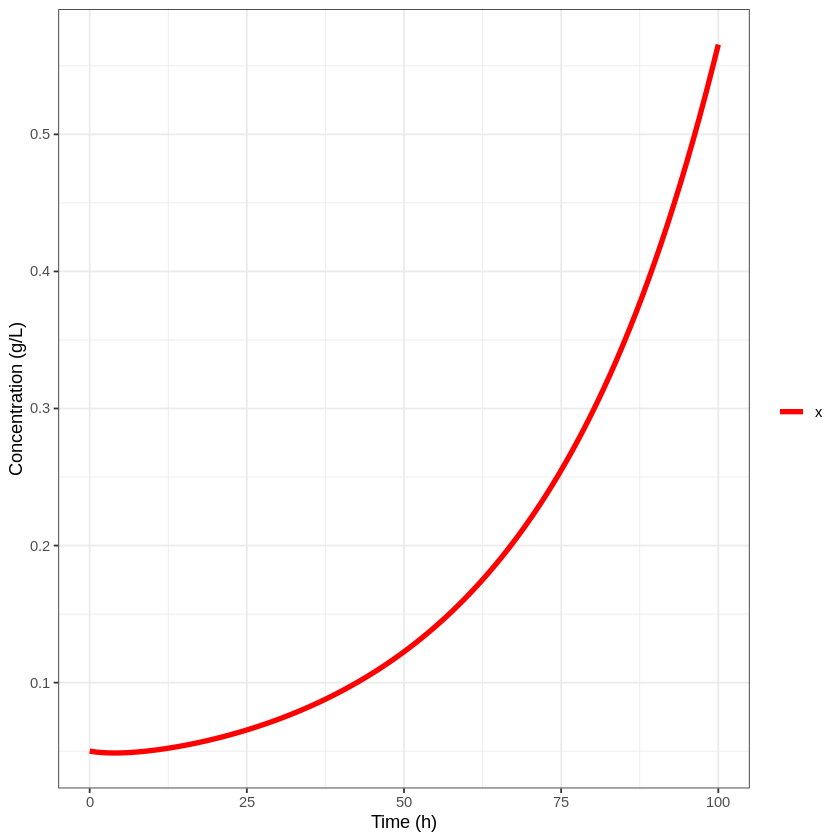

In [153]:
ggplot(out, aes(time)) +
        geom_line(aes(y = x, color = "x"),  lty = 1, lwd = 1.5) +
        scale_color_manual("", breaks = c("x"), values = c("red")) +
        xlab("Time (h)") +
        ylab("Concentration (g/L)") +
        theme_bw()

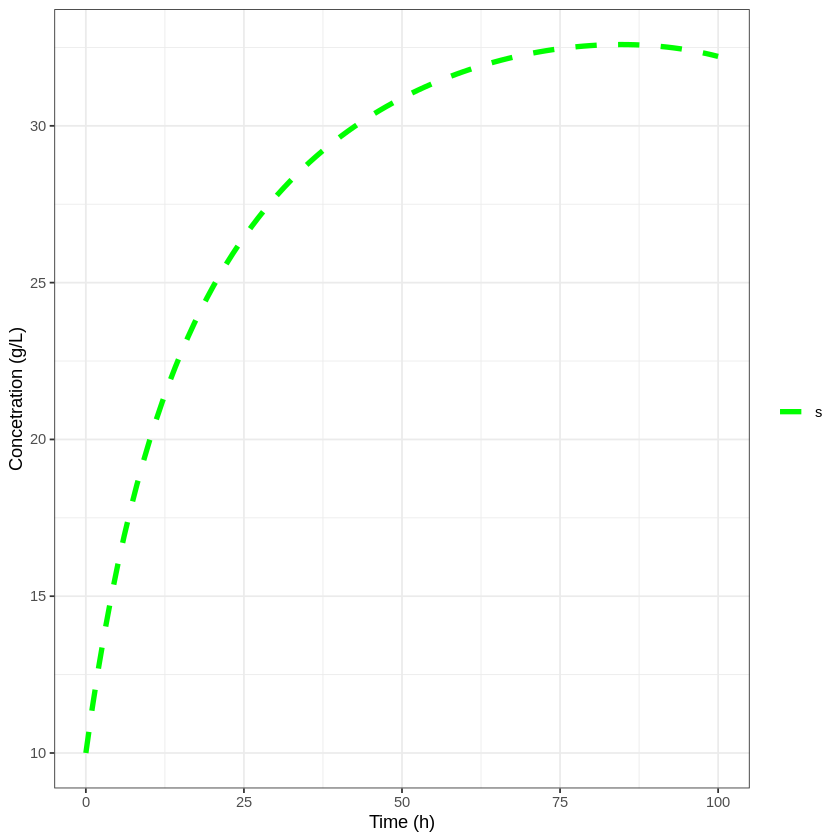

In [154]:
ggplot(out, aes(time)) +
        geom_line(aes(y = s, color = "s"),  lty = 2, lwd = 1.5) +
        scale_color_manual("", breaks = c("s"), values = c("green")) +
        xlab("Time (h)") +
        ylab("Concetration (g/L)") +
        theme_bw()

## Análisis con $F_{in}$ variable

Para investigar el efecto de variar $F_{in}$ durante la fermentación, creamos una función que nos ayude a hacer esto 

In [155]:
# función para simular una fermentación con Fin variable 
change_input <- function(times, state, parms, Fin, model) {
        
        n <- length(times)
        # vectores para guardar los resultados  V0 = s[2]!
        V0 <- state[1]
        V <- rep(V0, n)
        s0 <- state[2]
        su <- rep(s0,n)
        x0 <- state[3]
        x <- rep(x0,n)
        p0 <- state[4]
        p <- rep(p0,n)
        # resolver EDO para los diferentes valores de Fin
        
        for (i in 1:(n-1)) {
                
                tspan <- c(times[i], times[i+1])
                
                parms["Fin"] <- Fin[i+1]
                
                # resolver EDOs
                out <- ode(y = state,
                           times = tspan,
                           func = model,
                           parms = parms,
                           method = "rk4")
                
                m <- nrow(out)
                
                # guardar resultados 
                V[i+1] <- out[m,2]
                su[i+1] <- out[m,3] 
                x[i+1] <- out[m,4] 
                p[i+1] <- out[m,5]
                # actualizar condiciones iniciales
                state <- out[m,c(2,3,4,5)]
                
        }
        
        return(list(times = times, V = V, s = su, x = x, p = p, Fin = Fin))
        
}

In [156]:
# perfil de Fin en la entrada
n <- length(times)
Fin <- rep(0, n)
Fin[50:75] <- 0.5
Fin[76:n] <- 0

In [157]:
# Resolver EDOs
out <- change_input(state = s, times = times, parms = p, Fin = Fin, model = model1)
out <- as.data.frame(out)

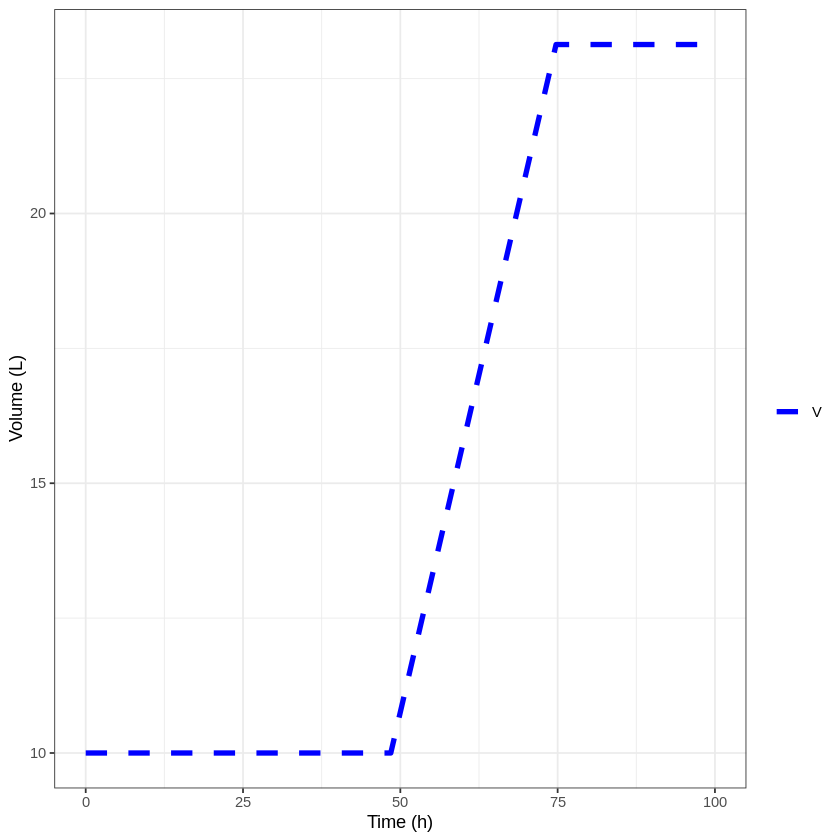

In [158]:
# mostrar resultados 
ggplot(out, aes(times)) +
        geom_line(aes(y=V, color = "V"), lty = 2, lwd = 1.5) +
        scale_color_manual("", breaks = c("V"), values = c("blue")) +
        xlab("Time (h)") +
        ylab("Volume (L)") +
        theme_bw()

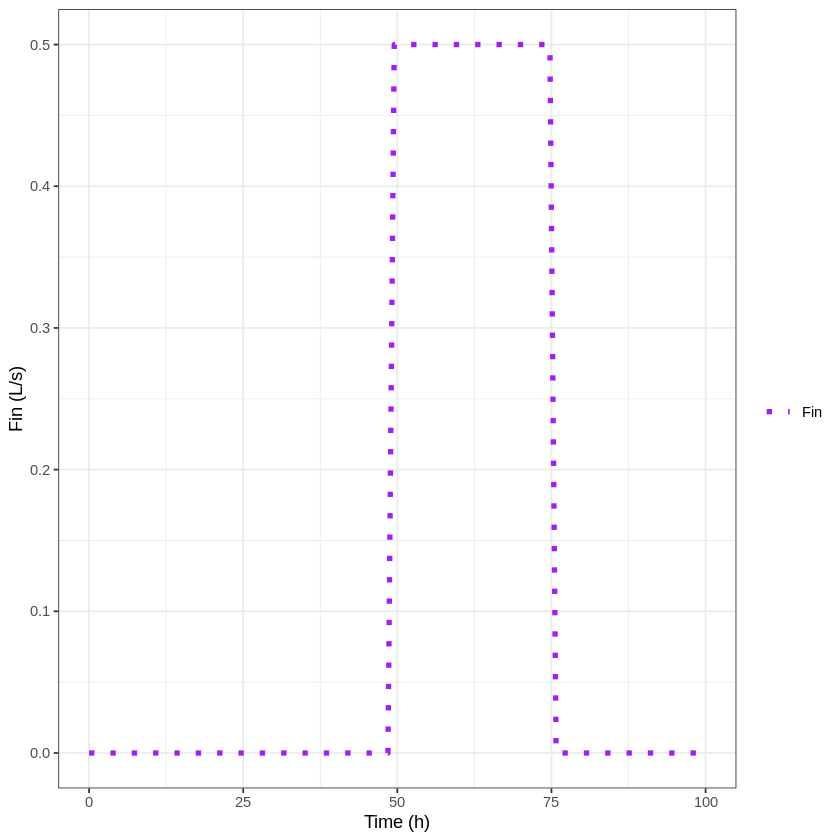

In [159]:
ggplot(out, aes(times)) +
        geom_line(aes(y=Fin, color = "Fin"), lty = 3, lwd = 1.5) +
        scale_color_manual("", breaks = c("Fin"), values = c("purple")) +
        xlab("Time (h)") +
        ylab("Fin (L/s)") +
        theme_bw()

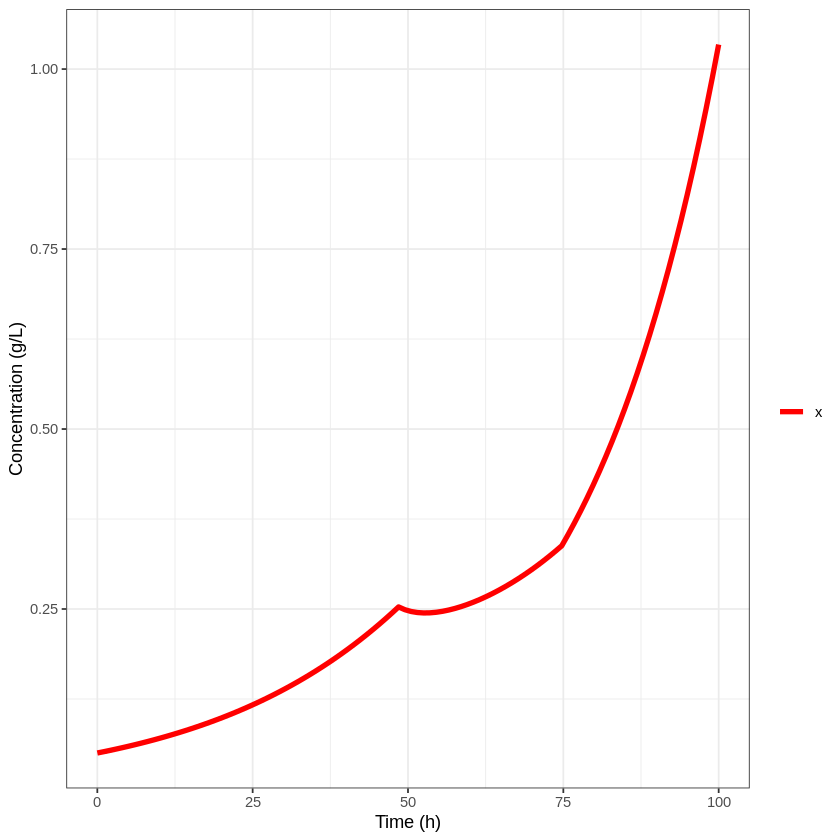

In [160]:
ggplot(out, aes(times)) +
        geom_line(aes(y=x, color = "x"), lty = 1, lwd = 1.5) +
        scale_color_manual("", breaks = c("x"), values = c("red")) +
        xlab("Time (h)") +
        ylab("Concentration (g/L)") +
        theme_bw()

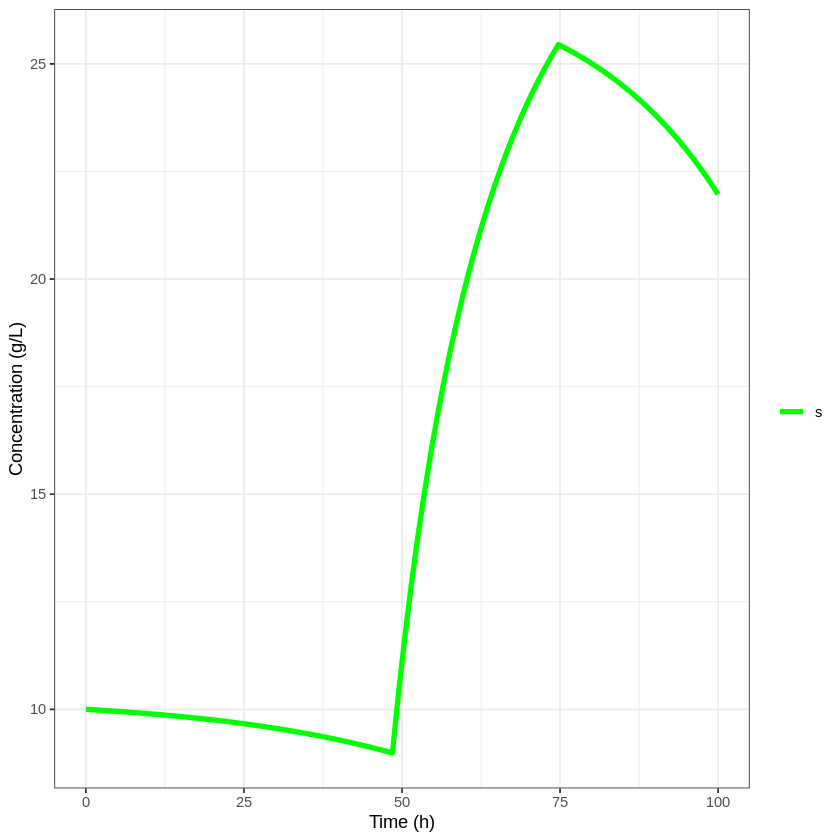

In [161]:
ggplot(out, aes(times)) +
        geom_line(aes(y=s, color = "s"), lty = 1, lwd = 1.5) +
        scale_color_manual("", breaks = c("s"), values = c("green")) +
        xlab("Time (h)") +
        ylab("Concentration (g/L)") +
        theme_bw()

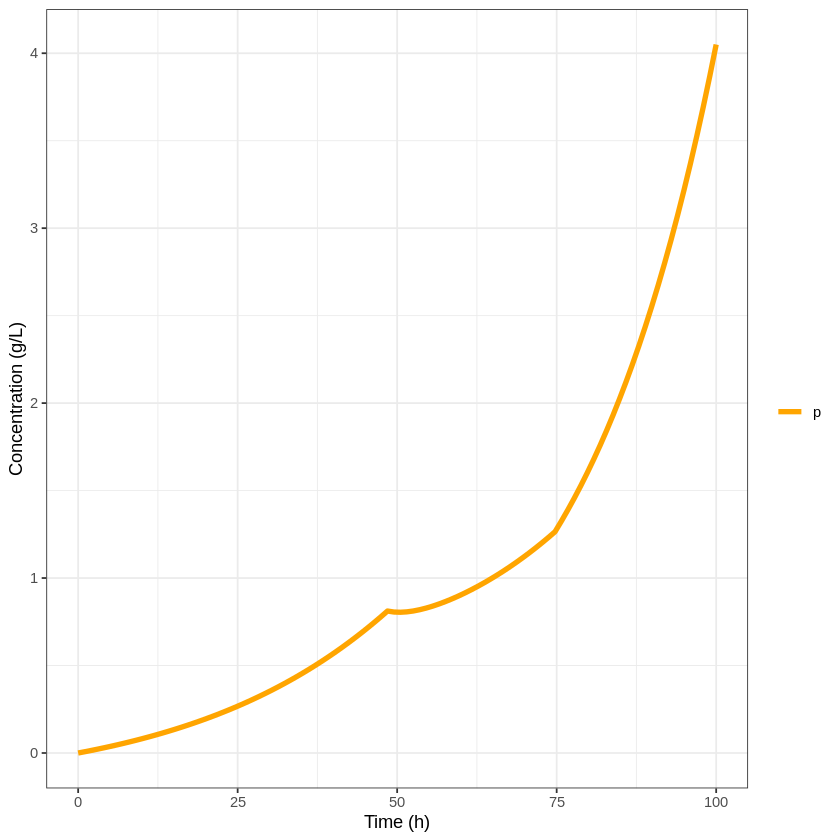

In [162]:
ggplot(out, aes(times)) +
        geom_line(aes(y=p, color = "p"), lty = 1, lwd = 1.5) +
        scale_color_manual("", breaks = c("p"), values = c("orange")) +
        xlab("Time (h)") +
        ylab("Concentration (g/L)") +
        theme_bw()

Con el objetivo de estudiar el efecto de $F_{in}$ en la concentración final de biomasa, creamos dos función que nos regresen la biomasa generada al final de la fermentación (`biomass1()`) y la biomasa final para diferentes valores de $F_{in}$ (`biomass2()`)

In [163]:
# función para obtener la masa final de biomasa (función a optimizar)
biomass1 <- function(times, state, parms, model) {
        
        out <- ode(y = state, times = times, func = model, parms = parms, method = "rk4")
        m <- nrow(out)
        
        ms_end <- out[m,2]*out[m,3]
        mx_end <- out[m,2]*out[m,4]
        mp_end <- out[m,2]*out[m,5]
        V_end <- out[m,2]
        s_end <- out[m,3]
        x_end <- out[m,4]
        p_end <- out[m,5]
        return(list(ms_end = ms_end, mx_end = mx_end, mp_end = mp_end, V_end = V_end, s_end = s_end, x_end = x_end, p_end = p_end))
}

In [164]:
# función para obtener la biomasa final para diferentes valores de Fin 
biomass2 <- function(times, state, parms, Fin, model) {
        
        n <- length(Fin)
        ms_end <- numeric(length = n)
        mx_end <- numeric(length = n)
        mp_end <- numeric(length = n)
        V_end <- numeric(length = n)
        s_end <- numeric(length = n)
        x_end <- numeric(length = n)
        p_end <- numeric(length = n)
        for (i in 1:n) {
                
                parms["Fin"] <- Fin[i]
                
                out <- biomass1(times = times,state = state,parms = parms, model = model)
                
                ms_end[i] <- out$ms_end
                mx_end[i] <- out$mx_end
                mp_end[i] <- out$mp_end
                V_end[i] <- out$V_end
                s_end[i] <- out$s_end
                x_end[i] <- out$x_end
                p_end[i] <- out$p_end
        }
        
        return(list(ms_end = ms_end, mx_end = mx_end, mp_end = mp_end, V_end = V_end, s_end = s_end, x_end = x_end, p_end = p_end))
}

Ahora podemos investigar si hay un valor de $F_{in}$ que permita obtener una máxima producción de biomasa

In [165]:
# valores de Fin a investigar 
Fin <- seq(0, 2, len = 100)

In [166]:
# obtener la biomasa al terminar la fermentación para cada valor de Fin 
out <- biomass2(times = times, state = s, parms = p, Fin = Fin, model = model1)

In [167]:
# guardar resultados 
out <- data.frame(Fin = Fin, ms_end = out$ms_end, mx_end = out$mx_end, mp_end = out$mp_end,
                  V_end = out$V_end, s_end = out$s_end, x_end = out$x_end, p_end = out$p_end)

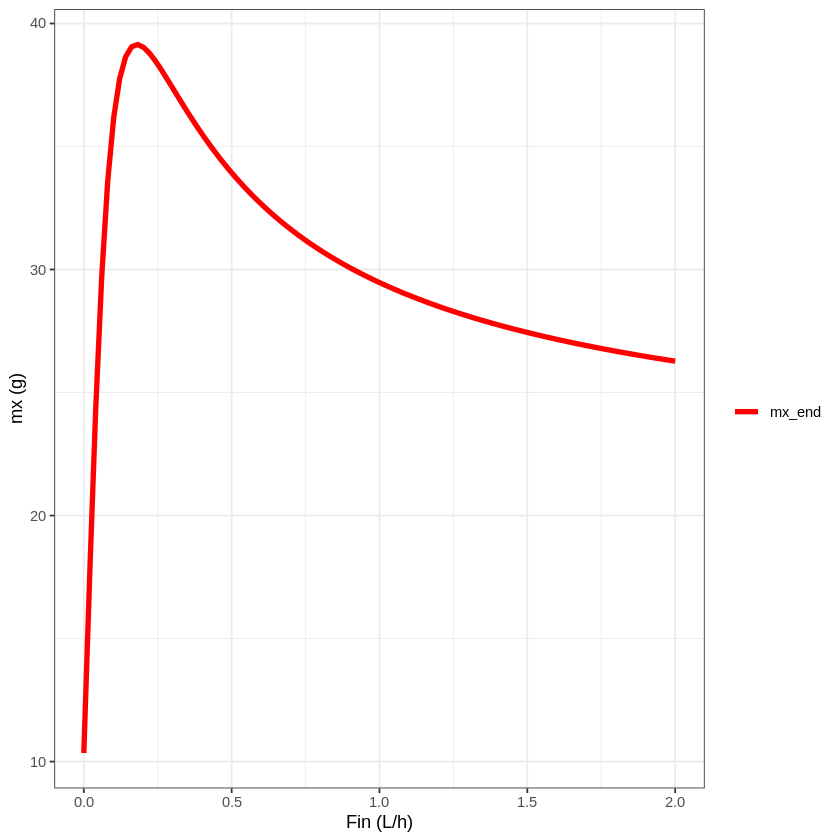

In [168]:
# mostrar resultados
ggplot(out, aes(Fin)) +
        geom_line(aes(y=mx_end, color = "mx_end"), lty = 1, lwd = 1.5) +
        scale_color_manual("", breaks = c("mx_end"), values = c("red")) +
        xlab("Fin (L/h)") +
        ylab("mx (g)") +
        theme_bw()

Al parecer existe un valor de $F_{in}$ que genera una máxima producción de $m_x$

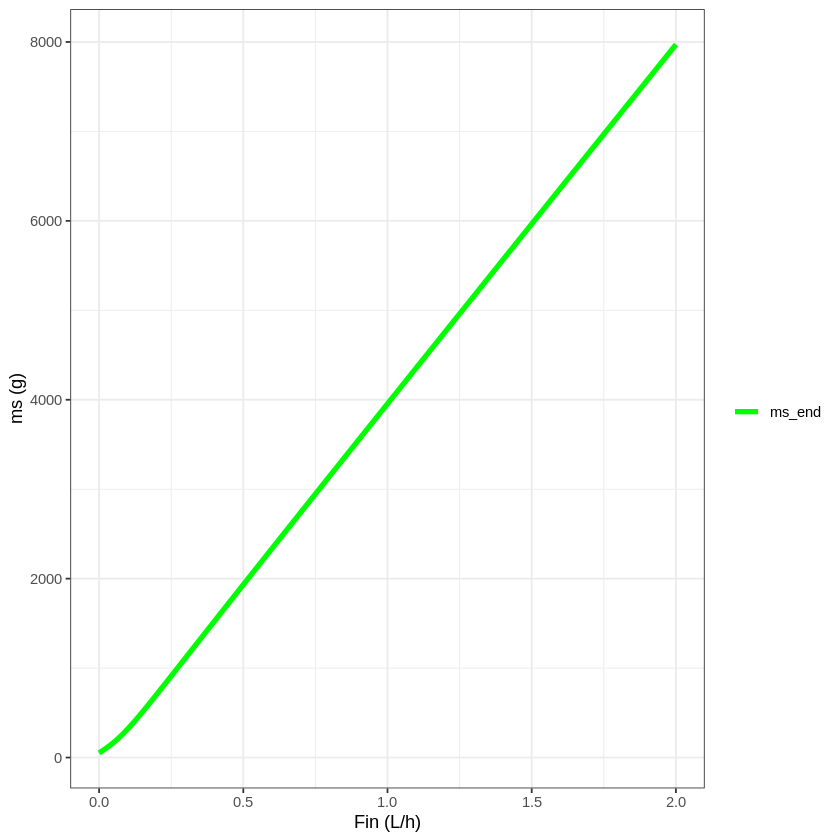

In [169]:
ggplot(out, aes(Fin)) +
        geom_line(aes(y=ms_end, color = "ms_end"), lty = 1, lwd = 1.5) +
        scale_color_manual("", breaks = c("ms_end"), values = c("green")) +
        xlab("Fin (L/h)") +
        ylab("ms (g)") +
        theme_bw()

## Efecto de los parámetros $k_{i}$ y $s_f$

Lo anterior se hizo manteniendo un valor de $k_i = 0.3\ L/g$, pero qué ocurre si el valor de este parámetros es diferente ¿Cómo influye eso en la producción de biomasa? A continuación, evaluamos el efecto de la alimentación $F_{in}$ sobre la producción de biomasa para diferentes paralores de $k_i$

In [170]:
# valores de Fin a evaluar
Fin <- seq(0, 3, len=100)
# valores de ki a evaluar
ki <- c(0.3,0.35,0.4,0.45,0.5,0.6)
# matriz para guardar los resultados 
out <- matrix(nrow = length(ki) + 1, ncol = length(Fin))
out[1,] <- Fin

In [171]:
# obtener la biomasa generada para los diferentes valores de Fin y ki 
p["sf"] <- 50
j <- 2
for (i in ki) {
        
        p["ki"] <- i
        out1 <- biomass2(times = times, state = s, parms = p, Fin = Fin, model = model1)
        out[j,] <- out1$mx_end
        j <- j + 1
}
p["sf"] <- 40

In [172]:
# preparar los resultados para mostrarlos 
out <- t(out)
out <- as.data.frame(out)
colnames(out) <- c("Fin", paste0("ki",seq(1,6)))

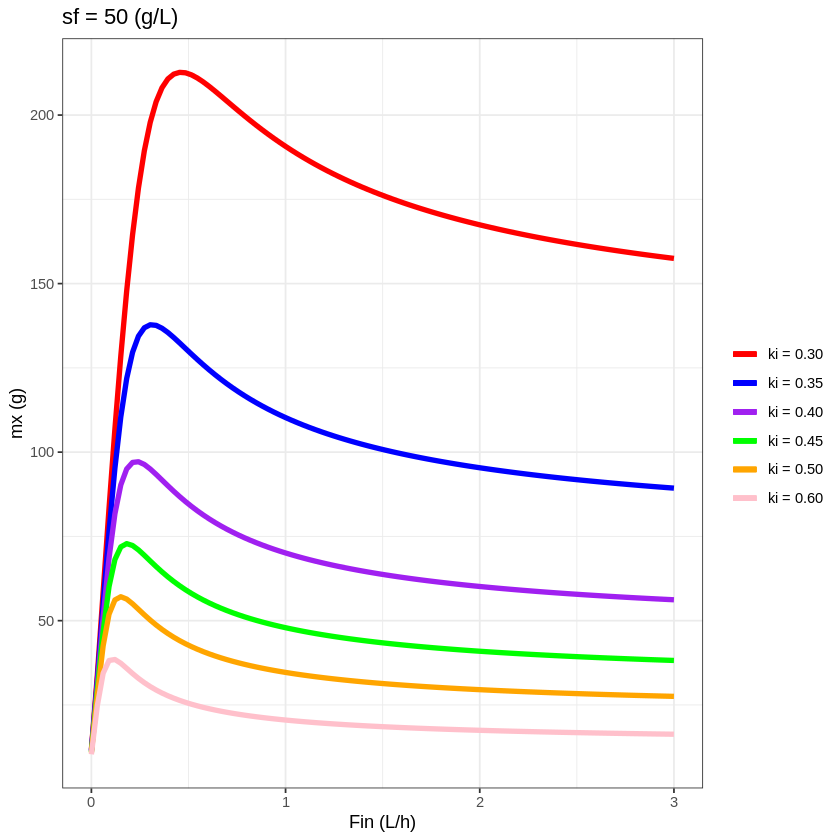

In [173]:
# mostrar resultados 
ggplot(out, aes(Fin)) +
        geom_line(aes(y = ki1, color = "ki = 0.30"), lwd = 1.5) +
        geom_line(aes(y = ki2, color = "ki = 0.35"), lwd = 1.5) +
        geom_line(aes(y = ki3, color = "ki = 0.40"), lwd = 1.5) +
        geom_line(aes(y = ki4, color = "ki = 0.45"), lwd = 1.5) +
        geom_line(aes(y = ki5, color = "ki = 0.50"), lwd = 1.5) +
        geom_line(aes(y = ki6, color = "ki = 0.60"), lwd = 1.5) +
        scale_color_manual("", breaks = c("ki = 0.30", "ki = 0.35", "ki = 0.40", 
                                          "ki = 0.45", "ki = 0.50", "ki = 0.60"),
                           values = c("red", "blue", "purple", "green", "orange", "pink")) + 
        xlab("Fin (L/h)") +
        ylab("mx (g)") + 
        labs(title = "sf = 50 (g/L)") +
        theme_bw()

Si además de cambiar el valor de $ki$ queremos cambiar el valor de $s_f$, es conveniente crear una función

In [174]:
# función para obtener la biomasa final para diferentes valores de Fin y ki
biomass3 <- function(times, state, parms, Fin, ki, model) {
        
        n <- length(ki)
        
        # lista para guardar los vectores que regresa biomass2()
        mx_end <- list(length = n)
        
        for (i in 1:n) {
                
                parms["ki"] <- ki[i]
                
                out <- biomass2(times = times,state = state,parms = parms,Fin = Fin, model = model)
                
                mx_end[[i]] <- out$mx_end # <- esto es un vector
                
        }
        
        return(mx_end)
}

La concentración de sustrato en el flujo de alimentación, $s_f$, tiene un gran efecto en la producción de biomasa. A coninuación estudiamos este efecto para diferentes valores de $s_f$

In [175]:
# valores de Fin a estudiar
Fin <- seq(0, 3, len = 100)
# valores de ki a evaluar
ki <- c(0.3, 0.35, 0.4, 0.45, 0.5, 0.6)
# valores de sf a estudiar 
sf <- seq(0, 50, 10)

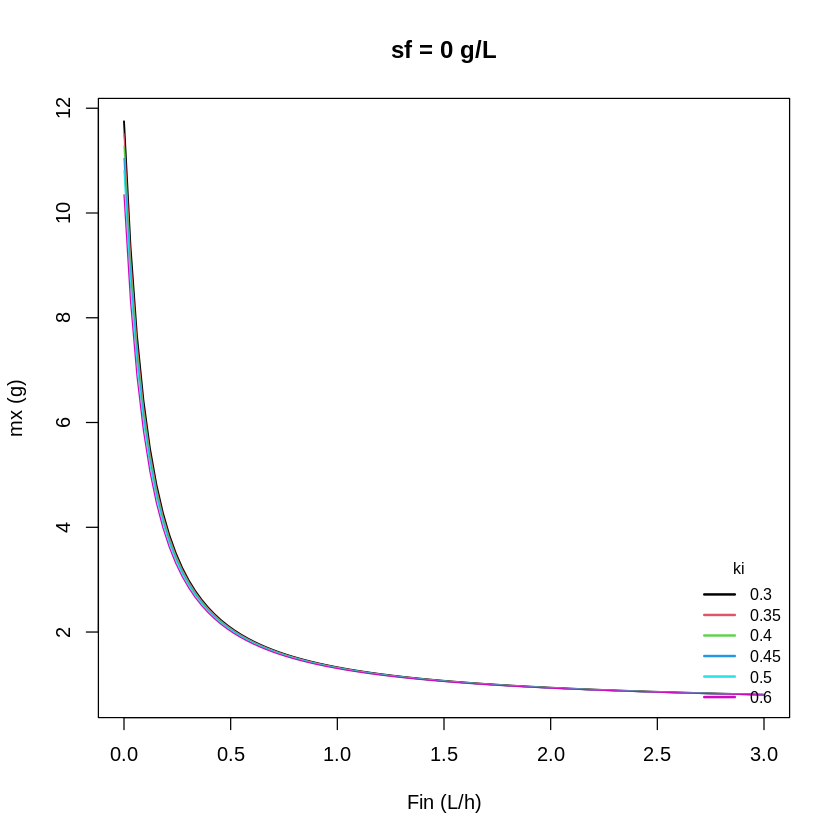

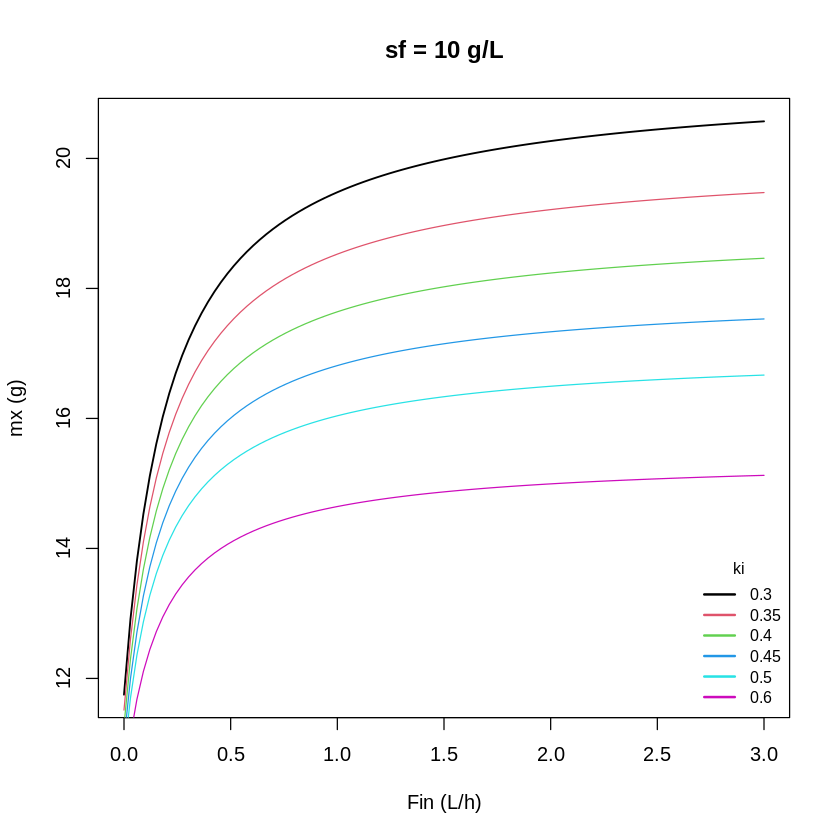

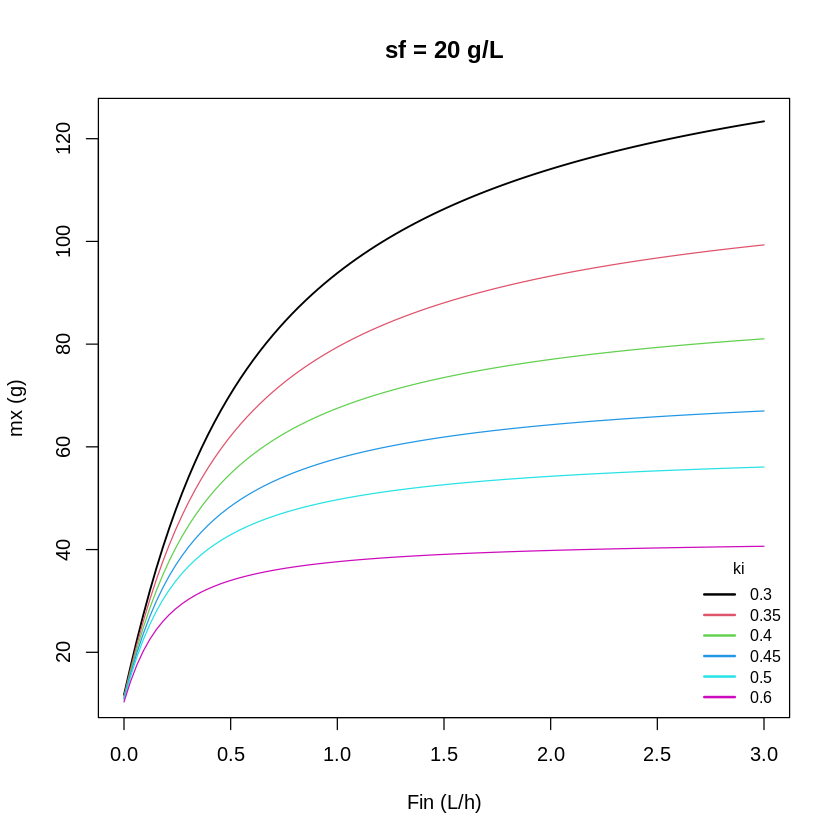

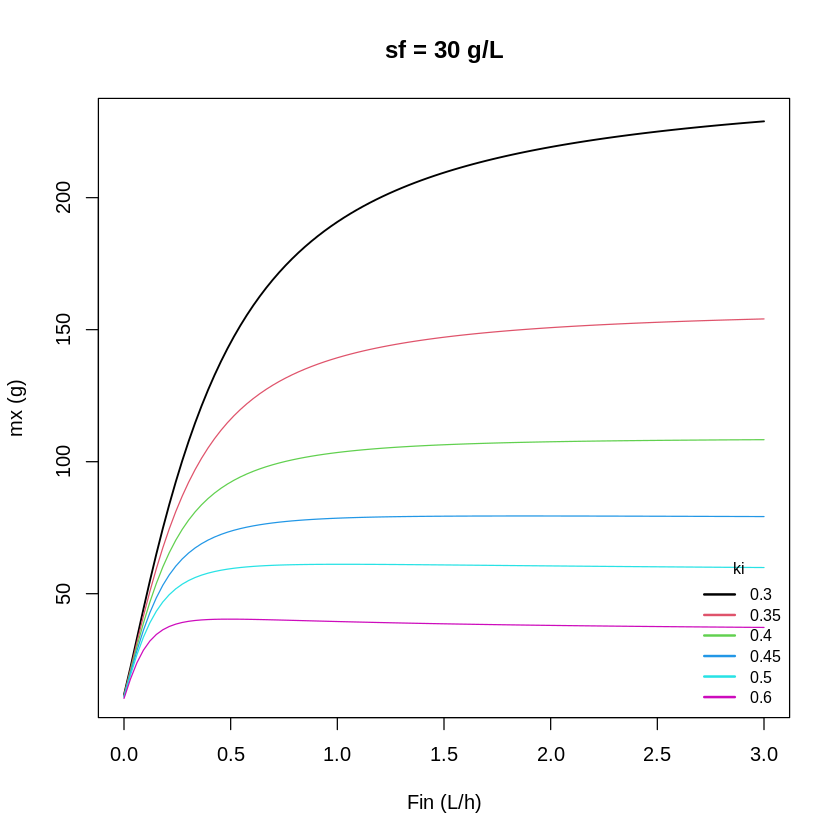

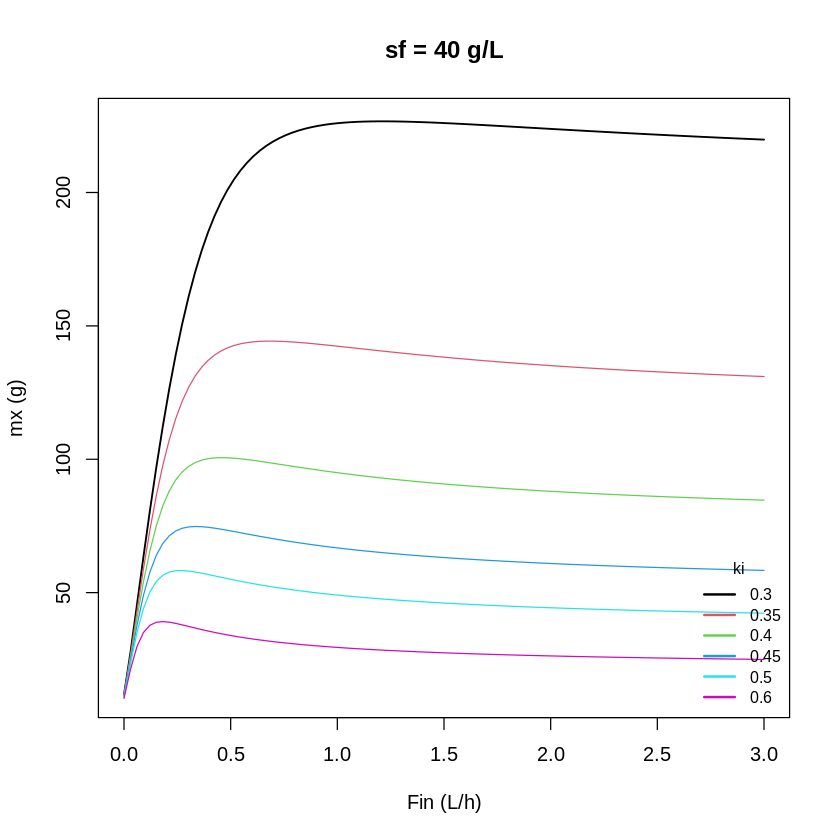

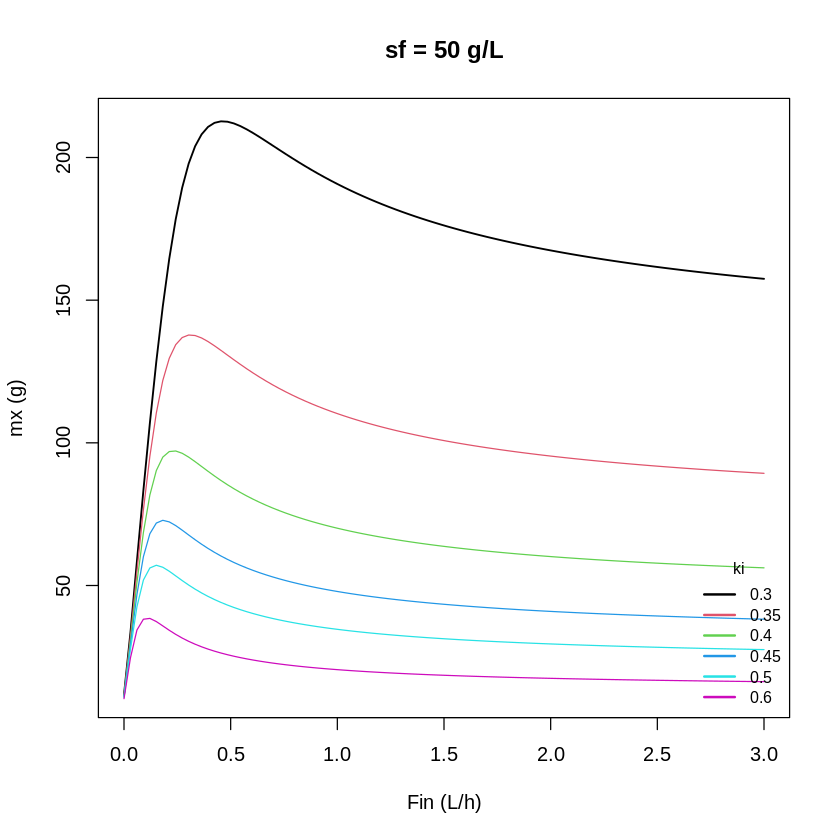

In [176]:
for (i in sf) {
        
        p["sf"] <- i
        
        out <- biomass3(times = times, state = s, parms = p, Fin = Fin, ki = ki, model = model1)
        
        for (j in 1:length(out)) {
                
                if (j == 1) {
                        
                        plot(Fin, out[[j]], ylab = "mx (g)", xlab = "Fin (L/h)" ,
                             main = paste0("sf = ", i, " g/L"), lwd = 1.5,
                        type = "l", col = j)
                }
                
                else {
                        lines(Fin, out[[j]], type = "l", col = j)
                }
                
                if (j == length(out)) {
                        
                        legend("bottomright", legend = ki, col = seq(1,length(ki)), bty = "n", lty = 1, 
                               cex = 0.8, title = "ki", lwd = 2)
                }
        }
        
}

Para hacer cada grafica se realizan 600 simulaciones 

# Optimización sin restricción de volumen 

Vemos en la gráfica anterior que cuando $ki = 0.3\ L/g$, y $s_f = 50\ g/L$ se presenta un máximo en la cantidad de biomasa generada en un valor de $F_{in} \approx 0.5 \ L/h$ ¿Podemos determinar este valor exactamente?

Nota: A partir de aquí el valor de los parámetros es

$\mu_{max} = 1.2\ h^{-1}$ \
$k_s = 280\ g/L $ \
$Y_{xs} = 0.2$ \
$Y_{px} = 4$ \
$s_{f} = 50\ g/L$ \
$k_{i} = 0.3\ L/g$ \

In [186]:
# valores de los parámetros para la optimización de Fin
Fin <- seq(0, 2, len = 100)
ki <- 0.3
p["ki"] <- ki
sf = 50
p["sf"] <- sf

mu_max     ks    Yxs    Ypx     sf    Fin     ki 
   1.2  280.0    0.2    4.0   50.0    0.5    0.3

In [178]:
# obtener biomasa final 
out <- biomass3(times = times, state = s, parms = p, Fin = Fin, ki = ki, model = model1)

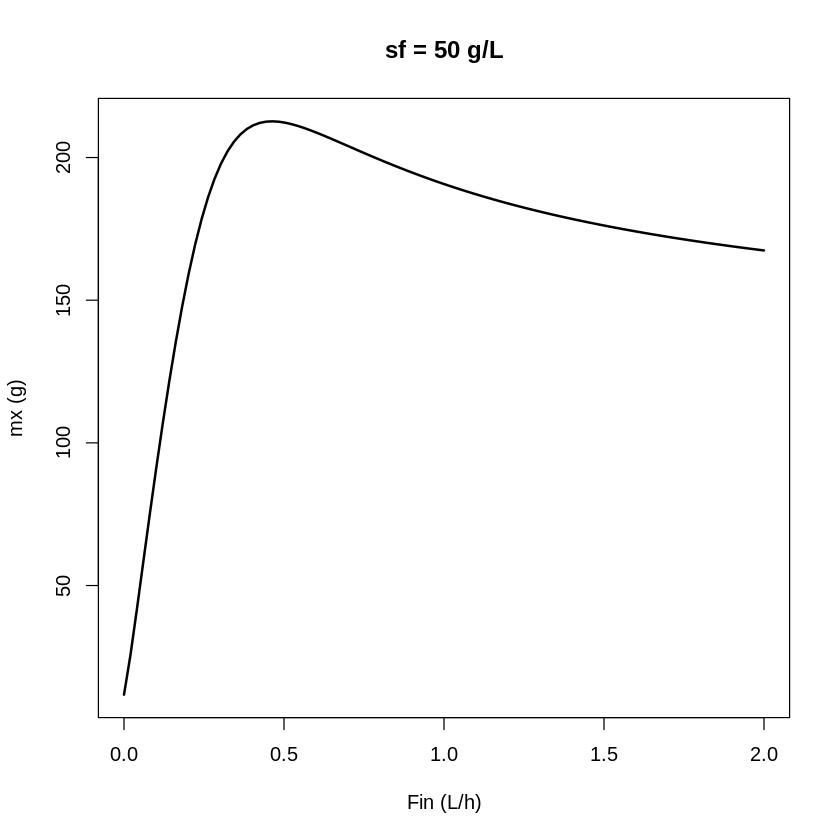

In [179]:
# mostrar grafica
plot(Fin, out[[1]], ylab = "mx (g)", xlab = "Fin (L/h)", main = paste0("sf = ", sf, " g/L"),
     type = "l", col = 1, lwd = 2)

### Encontrar el valor de $F_{in}$, que si mantenemos durante toda la fermentación, genera la máxima producción de biomasa

Para realizar las siguiente optimizaciones hacemos uso de algoritmos genéticos. Por esta  razón es conveniente explicar la terminología empleada con estos algoritmos

* Una solución candidata se denomina individuo. Una población denota un grupo de individuos.

* El genotipo o cromosoma denota la representación de la estructura de datos individuales.

* Un gen es una posición de valor en tal representación y un alelo es un valor particular para un gen.

* La función de evaluación se conoce como fitness y el fenotipo representa cómo opera el individuo durante la evaluación de la función fitness.

* La creación de nuevas soluciones se denomina cría y se produce debido a la aplicación de operadores genéticos, como el cruce y la mutación.

* Crossover implica la selección de soluciones de dos padres para generar hijos. La mutación realiza un ligero cambio en un individuo.


In [180]:
# definir la función a maximizar 
fitness1 <- function(x, times, state, parms, model) {
        
        parms["Fin"] <- x
        
        out <- biomass1(times = times, state = state, parms = parms, model = model)
        
        return(out$mx_end)
}

In [181]:
# evaluar la función 
fitness1(x = 1, times = times, state = s, parms = p, model = model1)

V 
190.711

In [187]:
# optimizar para encontrar Fin 
set.seed(123)
GA1 <- ga(type = "real-valued",
         fitness = fitness1,
         times= times,
         state = s,
         parms = p,
         model = model1,
         lower = 0,
         upper = 2,
         maxiter = 10,
         maxFitness = 1e6)

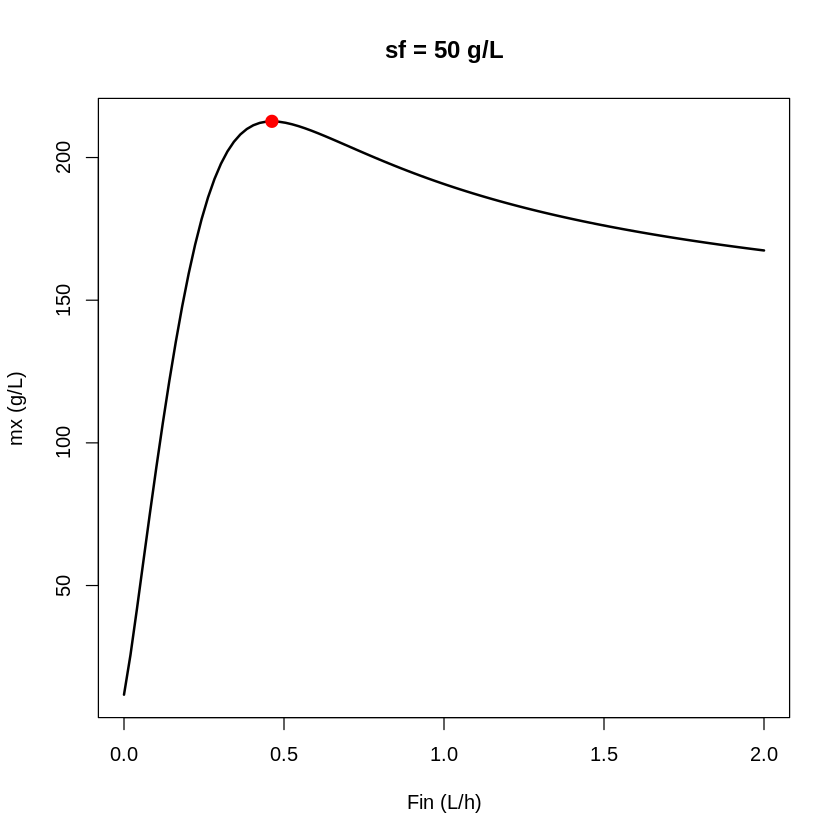

In [188]:
# mostrar grafica
plot(Fin, out[[1]], ylab = "mx (g/L)", xlab = "Fin (L/h)", main = paste0("sf = ", sf, " g/L"),
     type = "l", col = 1, lwd = 2)
points(GA1@solution, GA1@fitnessValue, col="red", pch = 20, cex = 2)

In [184]:
cat("Fin_opt:", GA1@solution," L/h" ,"\n")
cat("mx_opt:", GA1@fitnessValue, "g")

Fin_opt: 0.4621959  L/h 
mx_opt: 212.6873 g

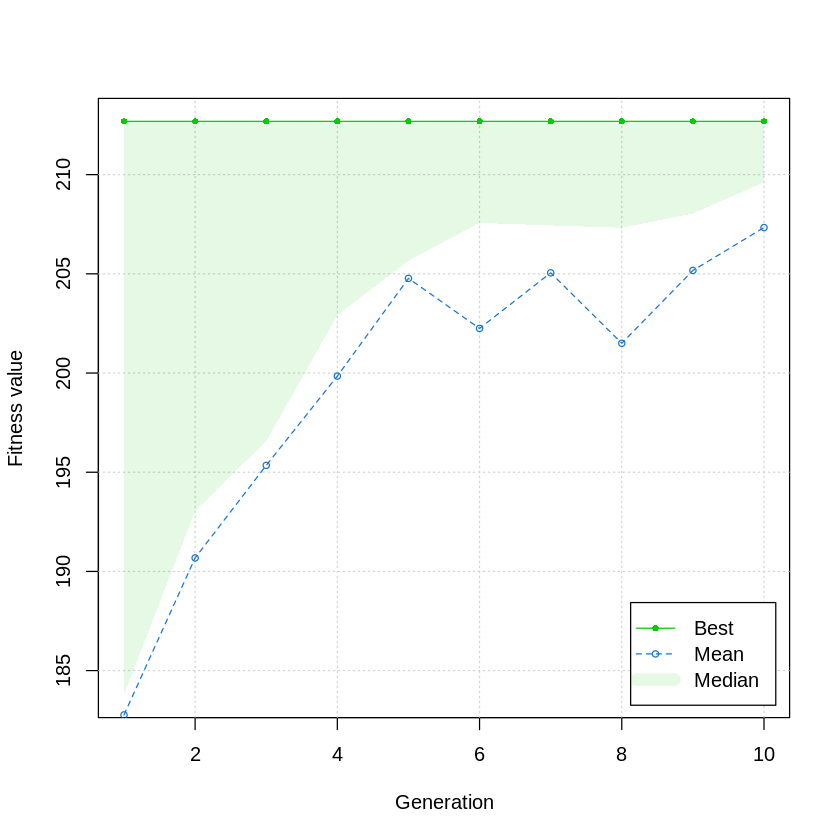

In [189]:
# evolución del GA
plot(GA1)

### Encontrar el perfil de alimentación $F_{in}$ que genera la máxima producción de biomasa

Pese a que lo anterior genera un buen resultado, no es una buena idea alimentar un flujo constante de sustrato al biorreactor. Los microorganismos experimentan diferentes fases de crecimiento, y en cada una de estas fases requieren diferentes cantidades de sustrato. Por lo anterior es evidente que una mejor estrategia de optimización es variar el flujo de alimentación $F_{in}$ de acuerdo a las necesidades del microorganismo. 

In [190]:
# función para variar el flujo de alimentación al biorreactor y obtener la biomasa generada al final 
# de la fermentación
fitness2 <- function(x, times, state, parms, model) {
        
        Fin <- rep(x, each = 10)
        
        out <- change_input(times = times, state = s, parms = p, Fin = Fin, model = model1)
        n <- length(out$V)
        
        mx_end <- out$x[n]*out$V[n]
        
        return(mx_end)
}

In [191]:
# optimizar para encontrar el perfil de Fin que genera la máxima cantidad de biomasa
set.seed(234)
GA2 <- ga(type = "real-valued",
         fitness = fitness2,
         times= times,
         state = s,
         parms = p,
         model = model1,
         lower = rep(0, 10),
         upper = rep(2, 10),
         maxiter = 100, 
         popSize = 50)

In [192]:
cat("mx_opt: ", GA2@fitnessValue, "g")

mx_opt:  235.627 g

In [193]:
Fin_opt2 <- rep(GA2@solution, each = 10)

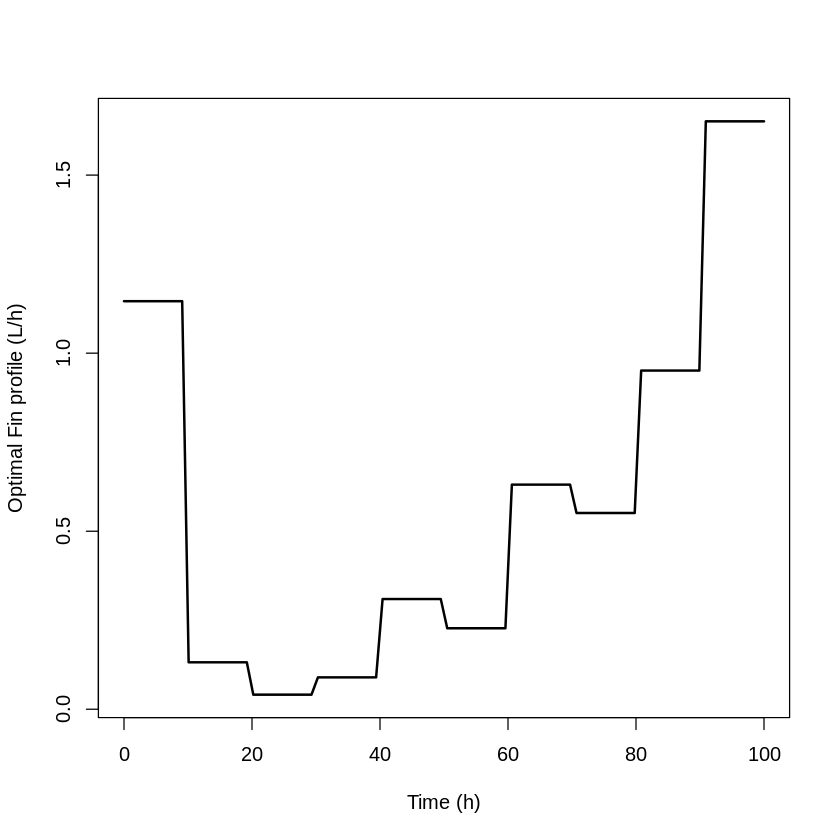

In [194]:
plot(times, Fin_opt2, type = "l", lwd = 2, ylab = "Optimal Fin profile (L/h)", xlab = "Time (h)")

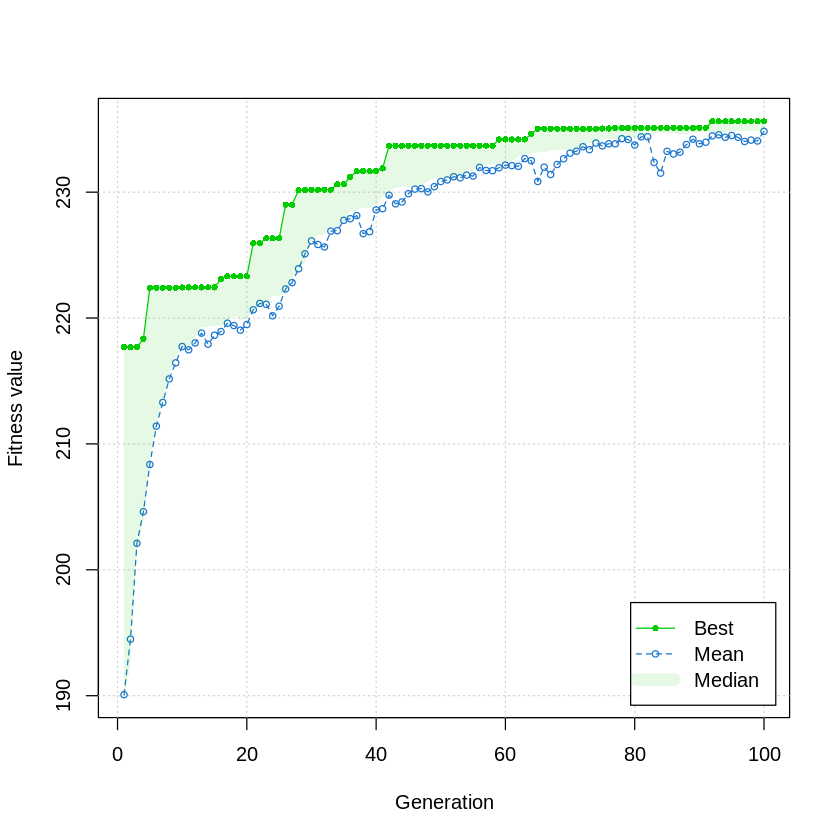

In [195]:
plot(GA2)

Vemos que con un perfil de $F_{in}$ obtenemos un mayor valor de $m_{x,opt}$ que si usamos un solo valor de $F_{in}$, aunque esto requiere un mayor coste computacional. 

In [196]:
# simular con el resultado de la simulación
out <- change_input(state = s, times = times, parms = p, Fin = Fin_opt2, model = model1)
data_opt2 <- data.frame(times = out$times, V = out$V, s = out$s, x = out$x, p = out$p, Fin = out$Fin)

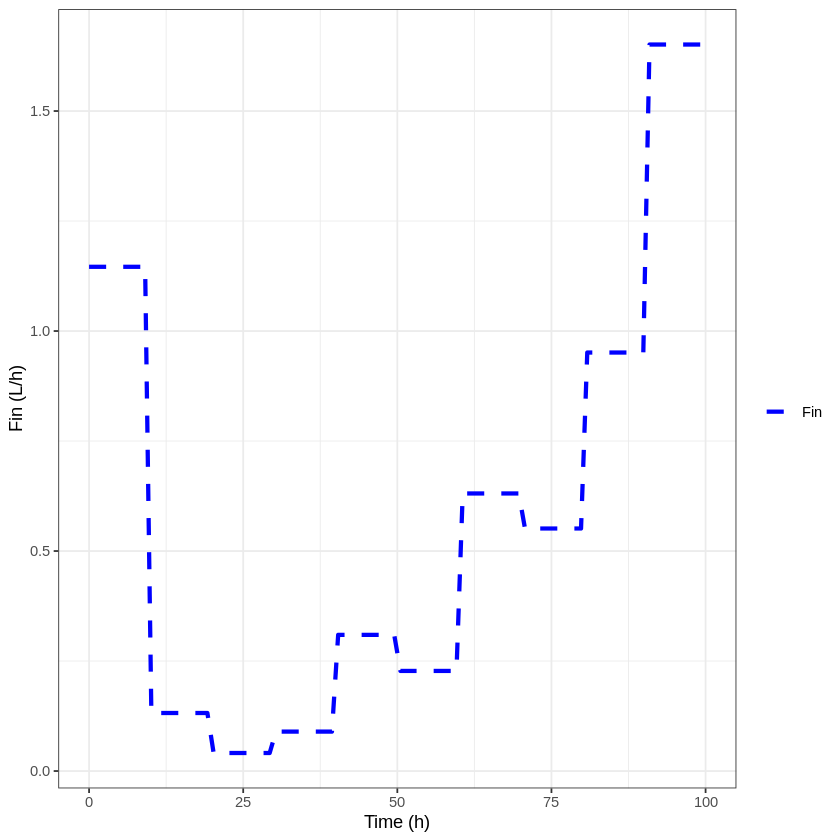

In [197]:
# mostrar resultados 
ggplot(data_opt2, aes(times)) +
        geom_line(aes(y = Fin, color = "Fin"), lty = 2, lwd = 1.2) +
        scale_color_manual("", breaks = c("Fin"), values = c("blue")) +
        xlab("Time (h)") +
        ylab("Fin (L/h)") +
        theme_bw()

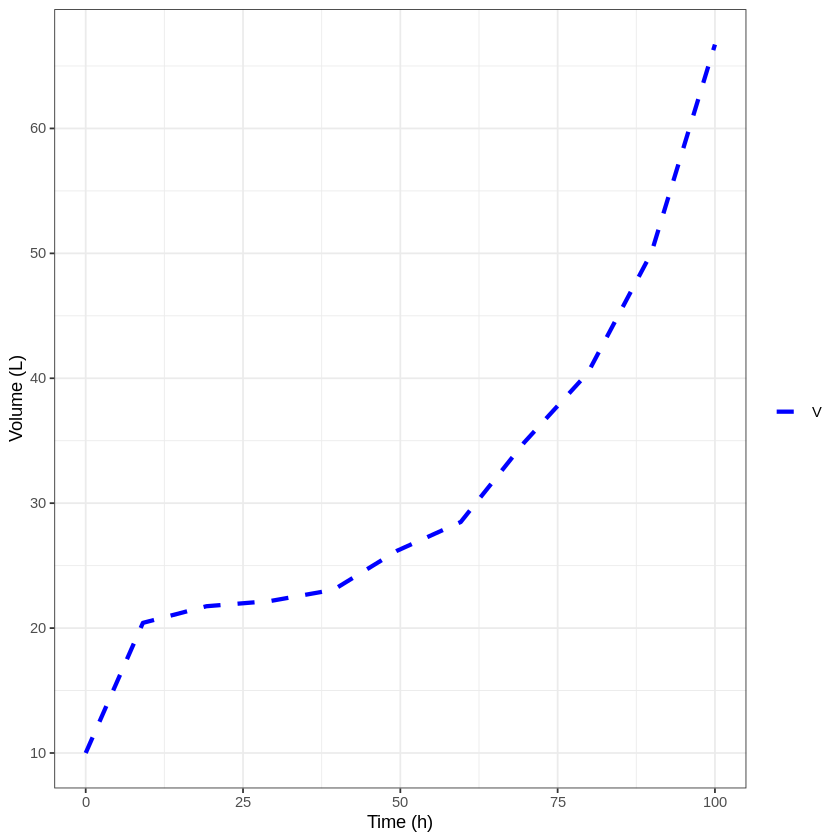

In [198]:

ggplot(data_opt2, aes(times)) +
        geom_line(aes(y=V, color = "V"), lty = 2, lwd = 1.2) +
        scale_color_manual("", breaks = c("V"), values = c("blue")) +
        xlab("Time (h)") +
        ylab("Volume (L)") +
        theme_bw()

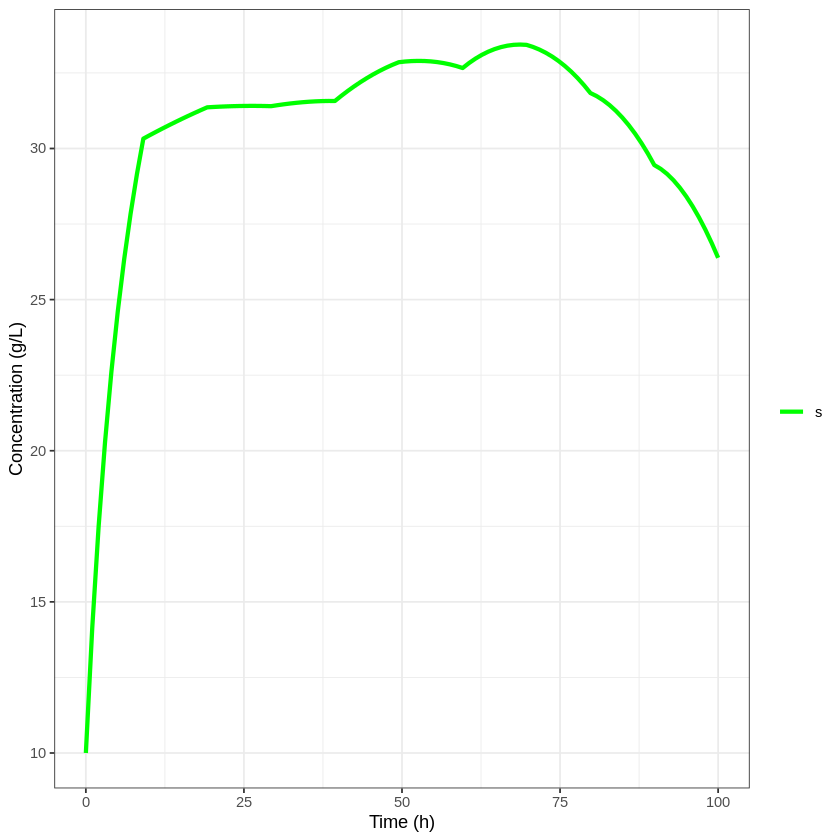

In [199]:
ggplot(data_opt2, aes(times)) +
        geom_line(aes(y=s, color = "s"), lty = 1, lwd = 1.2) +
        scale_color_manual("", breaks = c("s"), values = c("green")) +
        xlab("Time (h)") +
        ylab("Concentration (g/L)") +
        theme_bw()

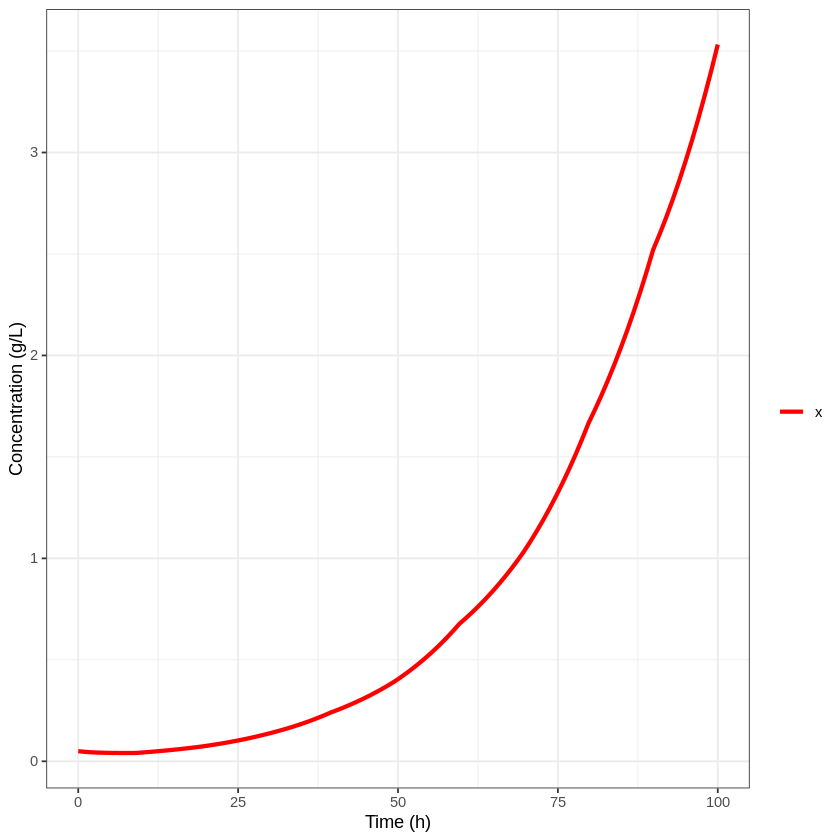

In [200]:
ggplot(data_opt2, aes(times)) +
        geom_line(aes(y=x, color = "x"), lty = 1, lwd = 1.2) +
        scale_color_manual("", breaks = c("x"), values = c("red")) +
        xlab("Time (h)") +
        ylab("Concentration (g/L)") +
        theme_bw()

In [201]:
# verificar valor máximo de biomasa
n <- length(times)
cat("mx_opt:", GA2@fitnessValue, "g \n")
cat("mx_end:",data_opt2$V[n]*data_opt2$x[n], "g")

mx_opt: 235.627 g 
mx_end: 235.627 g

## Comparación entre  la optimización con $F_{in}$ constante y con $F_{in}$ variable 

Para mostrar la diferencia entre las dos estrategias de optimización, podemos graficar juntos los resultados obtenidos con el flujo de alimentación constante y el perfil del flujo de alimentación 

In [202]:
# Fin en la optimización con Fin constante
Fin_opt1 <- GA1@solution

In [203]:
# realizar simulación con Fin_avg
n <- length(times)
Fin <- rep(Fin_opt1, n)
out <- change_input(state = s, times = times, parms = p, Fin = Fin, model = model1)

In [204]:
# guardar resultados  
data_opt1 <- data.frame(times = out$times, V = out$V, s = out$s, x = out$x, p = out$p, Fin = out$Fin)

Realizar comparaciones 

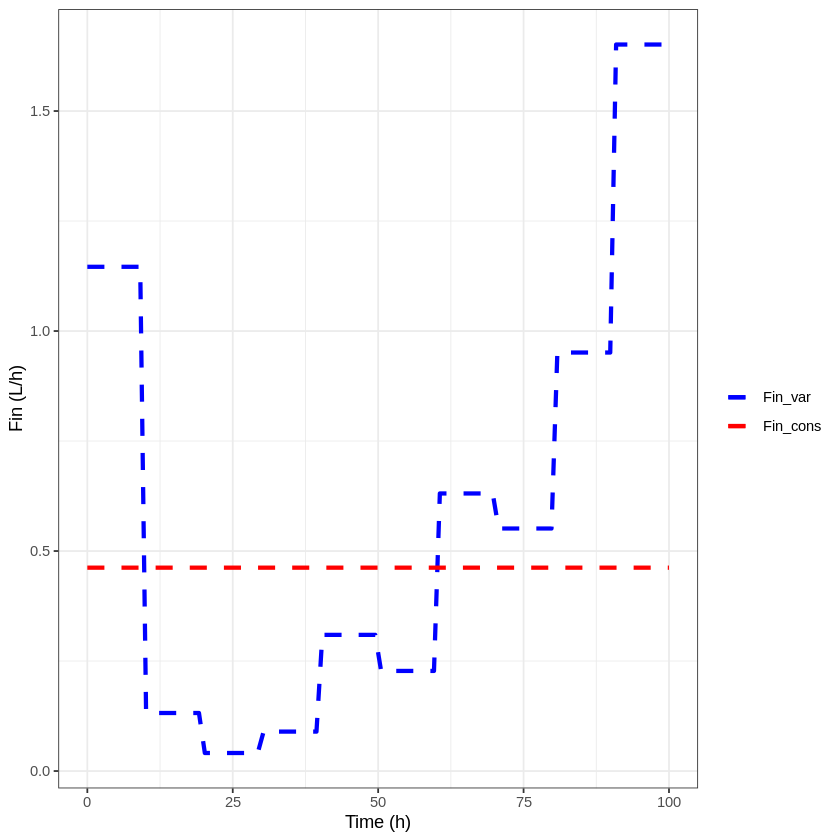

In [205]:
# comparar Fin 
ggplot(data_opt2, aes(times)) +
        geom_line(aes(y = Fin, color = "Fin_var"), lty = 2, lwd = 1.2) +
        geom_line(data = data_opt1, aes(y = Fin, color = "Fin_cons"), lty = 2, lwd = 1.2) +
        scale_color_manual("", breaks = c("Fin_var", "Fin_cons"), values = c("blue", "red")) +
        xlab("Time (h)") +
        ylab("Fin (L/h)") +
        theme_bw()

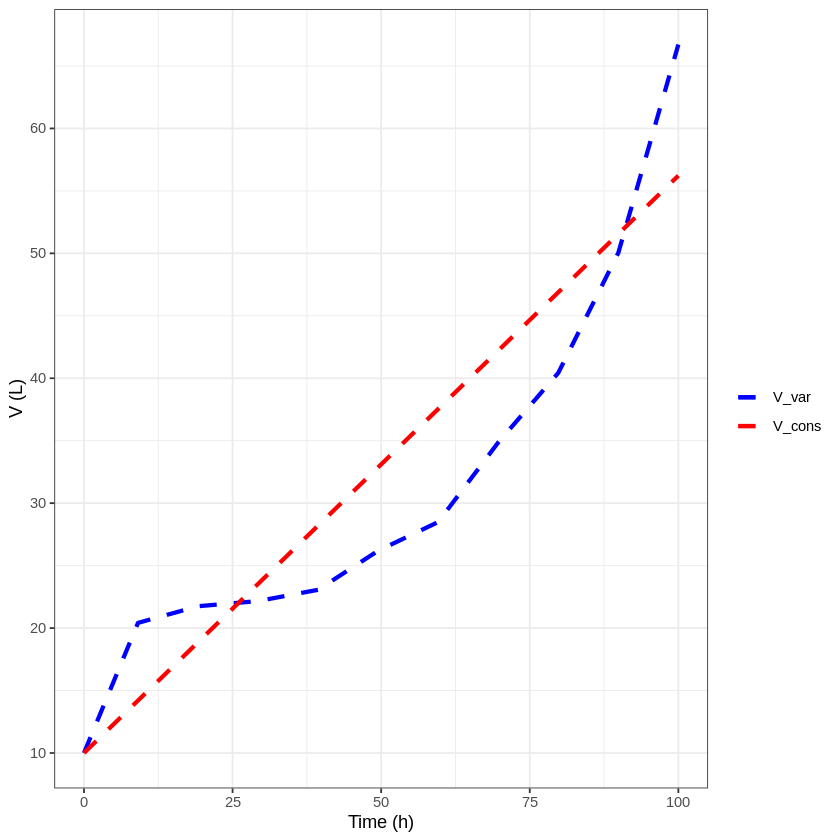

In [207]:
# mostrar resultados 
ggplot(data_opt2, aes(times)) +
        geom_line(aes(y = V, color = "V_var"), lty = 2, lwd = 1.2) +
        geom_line(data = data_opt1, aes(y = V, color = "V_cons"), lty = 2, lwd = 1.2) +
        scale_color_manual("", breaks = c("V_var", "V_cons"), values = c("blue", "red")) +
        xlab("Time (h)") +
        ylab("V (L)") +
        theme_bw()

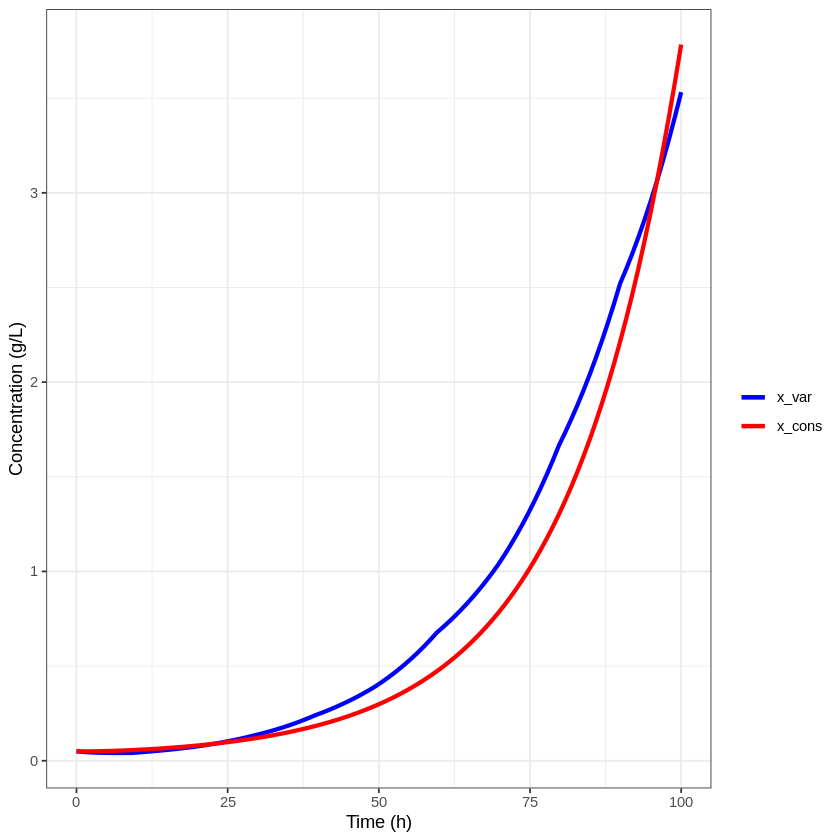

In [208]:
ggplot(data_opt2, aes(times)) +
        geom_line(aes(y = x, color = "x_var"), lty = 1, lwd = 1.2) +
        geom_line(data = data_opt1, aes(y = x, color = "x_cons"), lty = 1, lwd = 1.2) +
        scale_color_manual("", breaks = c("x_var", "x_cons"), values = c("blue", "red")) +
        xlab("Time (h)") +
        ylab("Concentration (g/L)") +
        theme_bw()

In [213]:
n <- length(data_opt1$times)
mx_end_cons <- data_opt1$V[n]*data_opt1$x[n]
mx_end_var <- data_opt2$V[n]*data_opt2$x[n]
cat("Fin constante: ","mx_end = ", mx_end_cons, "g \n")
cat("Fin variable: ","mx_end = ", mx_end_var, "g \n")
cat("diferencia: ", mx_end_var - mx_end_cons, "g")

Fin constante:  mx_end =  212.6873 g 
Fin variable:  mx_end =  235.627 g 
diferencia:  22.9397 g

Vemos que existe una diferencia en la cantidad de biomasa obtenida de 22.939
 g, o lo que es equivalente un 11 % más de biomasa. En un proceso industrial en que se generan toneladas de biomasa al año, este porcentaje puede llegar a representar una gran diferencia

# Modelo con restricción de volumen 

Ahora consideramos el caso en que el volumen del biorreactor tiene un límite, es decir, al momento de alimentar un flujo al biorreactor se debe considerar que este tiene una capacidad máxima y no es posible sobrepasar dicha capacidad.

En el siguiente modelo consideramos que si $V > V_{lim}$, entonces $F_{in} = 0$

In [88]:
# establecer modelo 
model2 <- function(times, state, parms) {
        with(as.list(c(state,parms)), {
                
                if (V > Vl) {

                        Fin = 0
                }
                
                # velocidad de crecimiento de biomasa
                rx = mu_max*s/(ks + s + ki*s^2)*x
                
                # velocidad de consumo de sustrato
                rs = (1/Yxs)*rx

                # velocidad de consumo de sustrato
                rp = Ypx*rx
                
                # balance de material global 
                dVdt = Fin 
                
                # balance de materia para sustrato
                dsdt = Fin/V*(sf - s) - rs
                
                # balance de materia para biomasa
                dxdt = - Fin/V*x + rx
                
                # balance de materia para el producto
                dpdt = - Fin/V*p + rp

                return(list(c(dVdt, dsdt, dxdt, dpdt), Fin = Fin))
        })
}

## Análisis con $F_{in}$ constante 

Establezcamos un volumen límite $V_{lim} = 60\ L$

Nota: A partir de aquí el valor de los parámetros es

$\mu_{max} = 1.2\ h^{-1}$ \
$k_s = 280\ g/L $ \
$Y_{xs} = 0.2$ \
$Y_{px} = 4$ \
$s_{f} = 50\ g/L$ \
$k_{i} = 0.3\ L/g$ \
$V_{lim} = 60\ L$


In [214]:
# establecer parámetros 
p <- c(mu_max = 1.2, ks = 280, Yxs = 0.2, Ypx = 4, sf = 50, Fin = 1.2, ki = 0.3, Vl = 60)

In [215]:
# establecer condiciones iniciales 
s <- c(V = 10, s = 10, x = 0.05, p = 0)

In [216]:
# tiempo de integración
times <- seq(0,100,len=100)

In [217]:
# resolver EDOs
out <- ode(y = s, times = times, func = model2, parms = p, method = "rk4")
out <- as.data.frame(out)

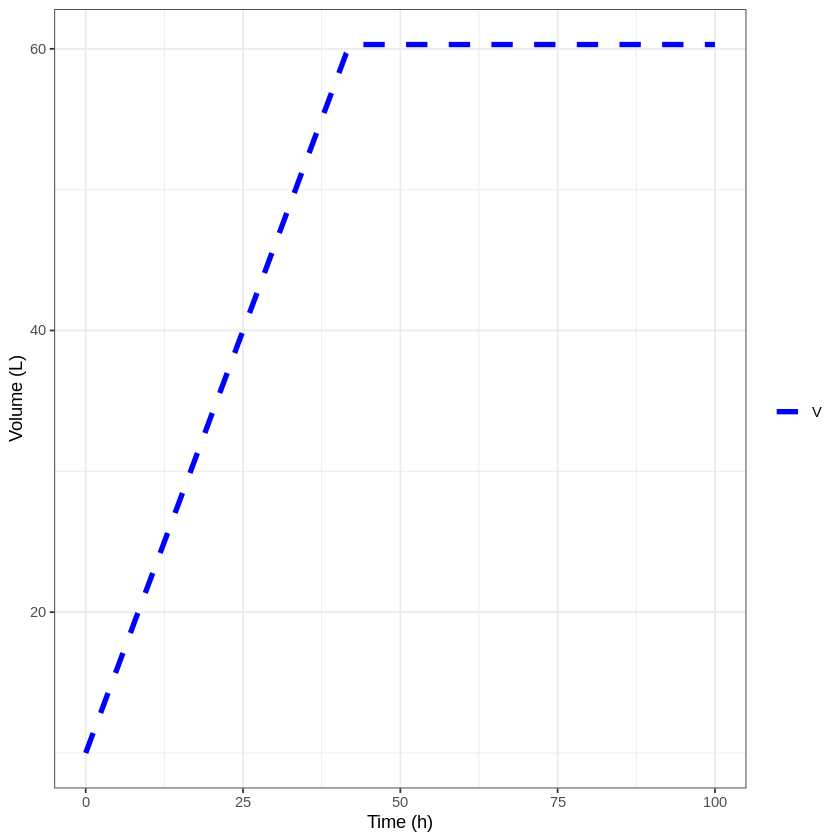

In [218]:
# mostrar resultados de simulación 
ggplot(out, aes(time)) +
  geom_line(aes(y = V, color = "V"), lty = 2, lwd = 1.5) +
  scale_color_manual("", breaks = c("V"), values = c("blue")) +
  xlab("Time (h)") +
  ylab("Volume (L)") +
  theme_bw()

Vemos que cuando se alcanza el volumen límite, $60\ L$, el volumen deja de incrementar. La siguiente gráfica muestra porque

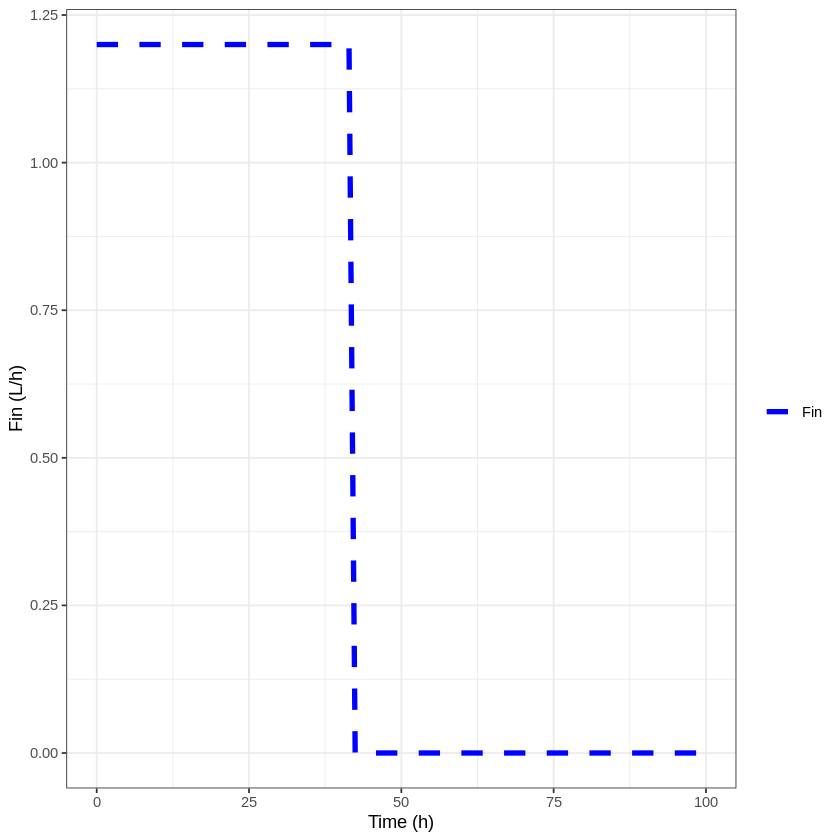

In [219]:
ggplot(out, aes(time)) +
  geom_line(aes(y = Fin, color = "Fin"), lty = 2, lwd = 1.5) +
  scale_color_manual("", breaks = c("Fin"), values = c("blue")) +
  xlab("Time (h)") +
  ylab("Fin (L/h)") +
  theme_bw()

Alrededor de la hora 40 cuando se alcanza el volumen límite, se detiene el flujo de alimentación 

## Análisis con $F_{in}$ variable

Definimos una nueva función que nos ayude a variar el flujo de alimentación, considerando que si $V > V_{lim}$ entonces $F_{in} = 0$

In [220]:
change_input2 <- function(times, state, parms, Fin, model) {
        
        n <- length(times)
        # vectores para guardar los resultados  V0 = s[2]!
        V0 <- state[1]
        V <- rep(V0, n)
        s0 <- state[2]
        su <- rep(s0,n)
        x0 <- state[3]
        x <- rep(x0,n)
        p0 <- state[4]
        p <- rep(p0,n)
        
        # resolver EDO para los diferentes valores de Fin
        
        for (i in 1:(n-1)) {
                
                tspan <- c(times[i], times[i+1])
                
                parms["Fin"] <- Fin[i+1]
                
                # resolver EDOs
                out <- ode(y = state,
                           times = tspan,
                           func = model,
                           parms = parms,
                           method = "rk4")
                
                m <- nrow(out)
                # actualizar condiciones iniciales
                state <- out[m,c(2,3,4,5)]
                out <- as.data.frame(out)
                # guardar resultados 
                V[i+1] <- out$V[m]
                su[i+1] <- out$s[m]
                x[i+1] <- out$x[m]
                p[i+1] <- out$p[m]
                Fin[i+1] <- out$Fin[m]
        }
        
        return(list(times = times, V = V, s = su, x = x, p = p, Fin = Fin))
}

In [221]:
# perfil Fin para la simulación 
n <- length(times)
Fin <- rep(0, n)
Fin[51:n] <- 1.2

In [222]:
# simular proceso con Fin variable 
out <- change_input2(state = s, times = times, parms = p, Fin = Fin, model = model2)
out <- as.data.frame(out)

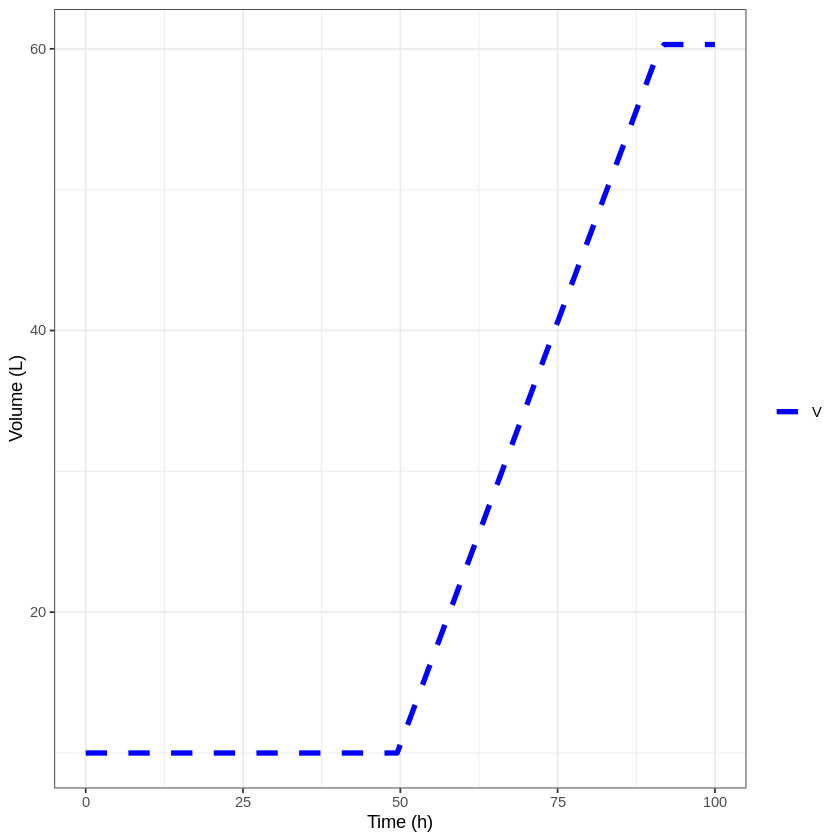

In [223]:
# mostrar resultados 
ggplot(out, aes(times)) +
        geom_line(aes(y = V, color = "V"), lty = 2, lwd = 1.5) +
        scale_color_manual("", breaks = c("V"), values = c("blue")) +
        xlab("Time (h)") +
        ylab("Volume (L)") +
        theme_bw()

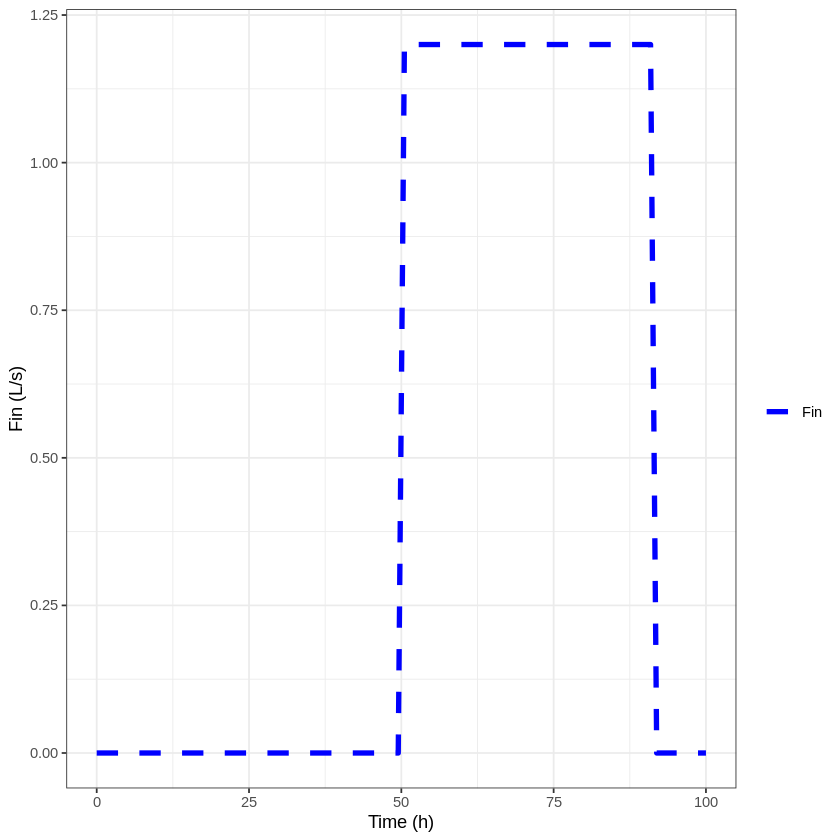

In [224]:
ggplot(out, aes(times)) +
        geom_line(aes(y = Fin, color = "Fin"), lty = 2, lwd = 1.5) +
        scale_color_manual("", breaks = c("Fin"), values = c("blue")) +
        xlab("Time (h)") +
        ylab("Fin (L/s)") +
        theme_bw()

Aun cuando establecimos un valor de $F_{in} = 1.2\ L/h$ para el intervalo de tiempo de la hora 51 a la hora 100, el flujo se detiene antes de la hora 100 debido a que se ha alcanzado el volumen límite del biorreactor, $60\ L$

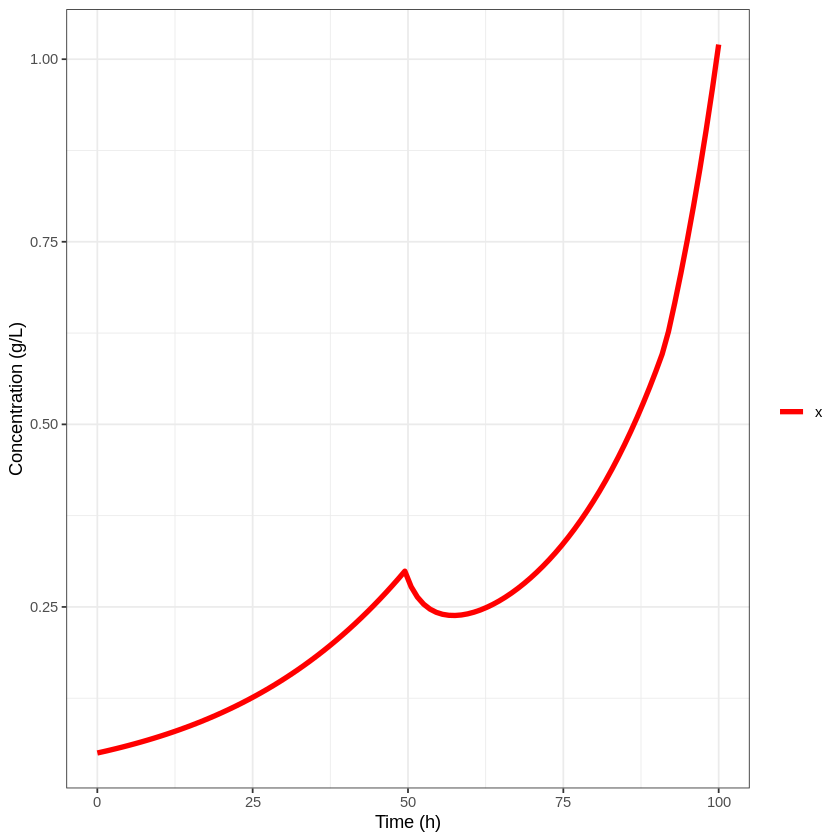

In [102]:
ggplot(out, aes(times)) +
        geom_line(aes(y = x, color = "x"), lty = 1, lwd = 1.5) +
        scale_color_manual("", breaks = c("x"), values = c("red")) +
        xlab("Time (h)") +
        ylab("Concentration (g/L)") +
        theme_bw()

# Optimización con restricción de volumen 

### Encontrar el valor de $F_{in}$, que si mantenemos durante toda la fermentación, genera la máxima producción de biomasa. Considerando que $V < V_{lim}$

Vamos a intentar encontrar el valor de $F_{in}$ que permite generar la mayor producción de biomasa al final de la fermentación. Recordemos que los valores de los parámetros son $k_i = 0.3\ L/g$, $s_f = 50\ g/L$, y $V_{lim} = 60\ L $

In [232]:
# intervalo de Fin en los que buscamos el óptimo
Fin <- seq(0,2,len=100)
# valor de ki que nos interesa estudiar
ki <- 0.3
p["ki"] <- ki
# valor de sf que nos interesa estudiar 
sf = 50
p["sf"] <- sf
# valor de Vlim que nos interesa estudiar 
Vl = 60
p["Vl"] <- Vl

mu_max     ks    Yxs    Ypx     sf    Fin     ki     Vl 
   1.2  280.0    0.2    4.0   50.0    1.2    0.3   60.0

In [233]:
# realizar simulaciones para todos los valores de Fin constate 
out <- biomass3(times = times, state = s, parms = p, Fin = Fin, ki = ki, model = model2)

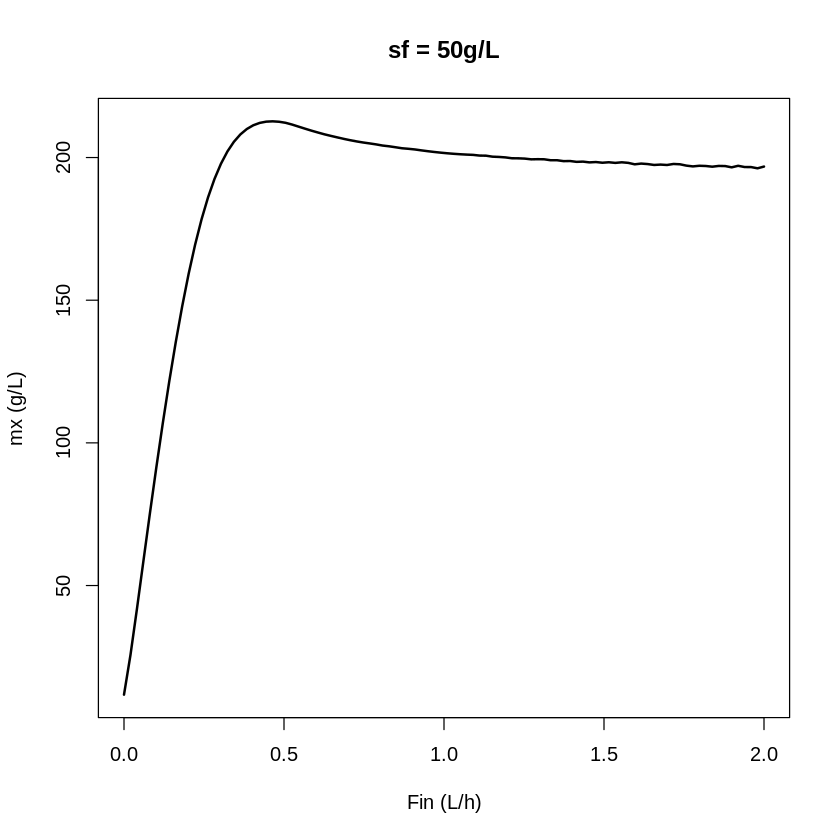

In [234]:
plot(Fin, out[[1]], ylab = "mx (g/L)", xlab = "Fin (L/h)", main = paste0("sf = ", sf, "g/L"), # biomass3() regresa una lista con vectores
     type = "l", col = 1, lwd = 2)

In [235]:
# realizar optimización 
set.seed(345)
GA3 <- ga(type = "real-valued",
         fitness = fitness1,
         times= times,
         state = s,
         parms = p,
         model = model2,
         lower = 0,
         upper = 2,
         maxiter = 10,
         maxFitness = 1e6)

In [236]:
cat("Fin_opt:", GA3@solution, "L/h \n")
cat("mx_opt:", GA3@fitnessValue, "g")

Fin_opt: 0.4599333 L/h 
mx_opt: 212.6853 g

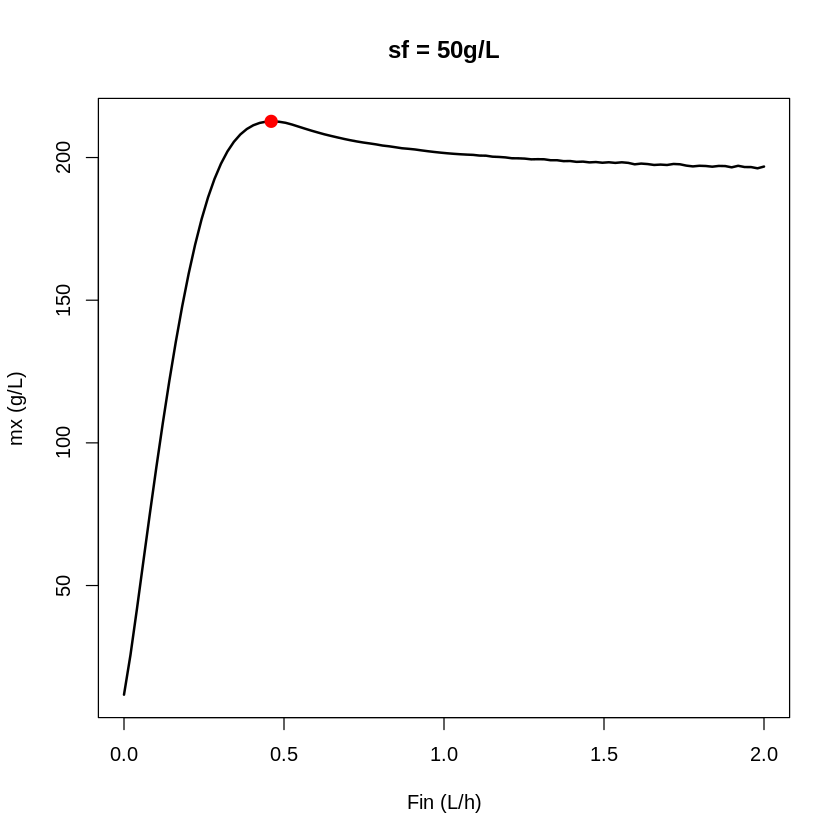

In [237]:
# graficar resultados 
plot(Fin, out[[1]], ylab = "mx (g/L)", xlab = "Fin (L/h)", main = paste0("sf = ", sf, "g/L"), # biomass3() regresa una lista con vectores
     type = "l", col = 1, lwd = 2)
points(GA3@solution, GA3@fitnessValue, col="red", pch = 20, cex = 2)

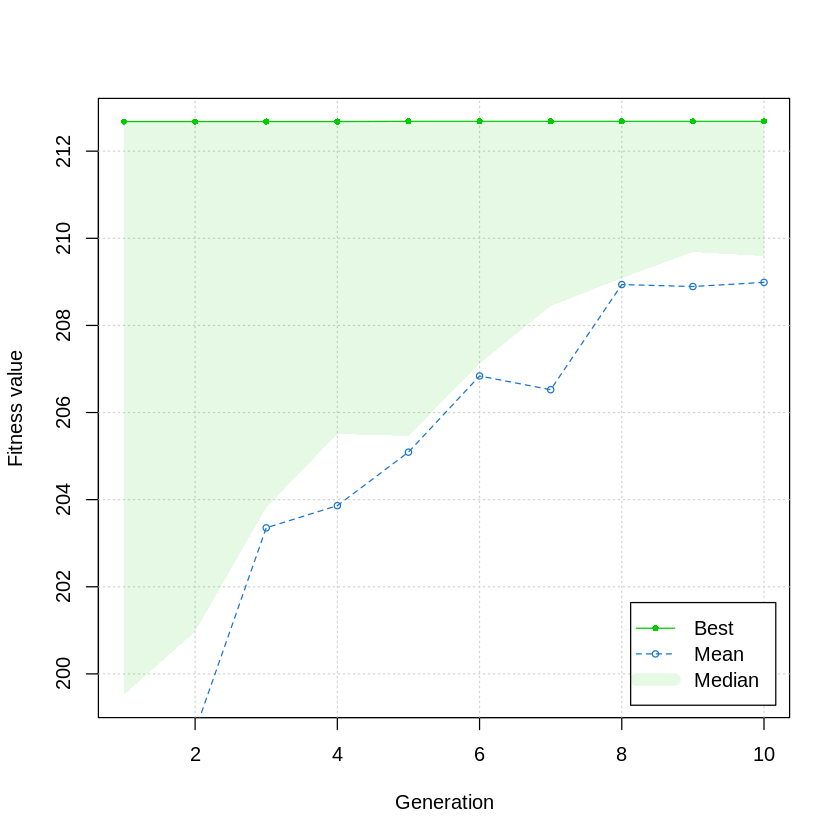

In [238]:
# evolución del GA 
plot(GA3)

### Encontrar el perfil de alimentación $F_{in}$ que genera la máxima producción de biomasa. Considerando que $V < V_{lim}$

Ahora optimizamos para encontrar el perfil $F_{in}$ que genere una máxima producción de biomasa

In [240]:
# realizar optimización 
set.seed(456)
GA4 <- ga(type = "real-valued",
          fitness = fitness2,
          times= times,
          state = s,
          parms = p,
          model2,
          lower = rep(0, 10),
          upper = rep(2, 10),
          maxiter = 100, popSize = 50)

In [241]:
cat("mx_opt:", GA4@fitnessValue, "g")

mx_opt: 235.8425 g

In [244]:
Fin_opt4 <- rep(GA4@solution, each = 10)

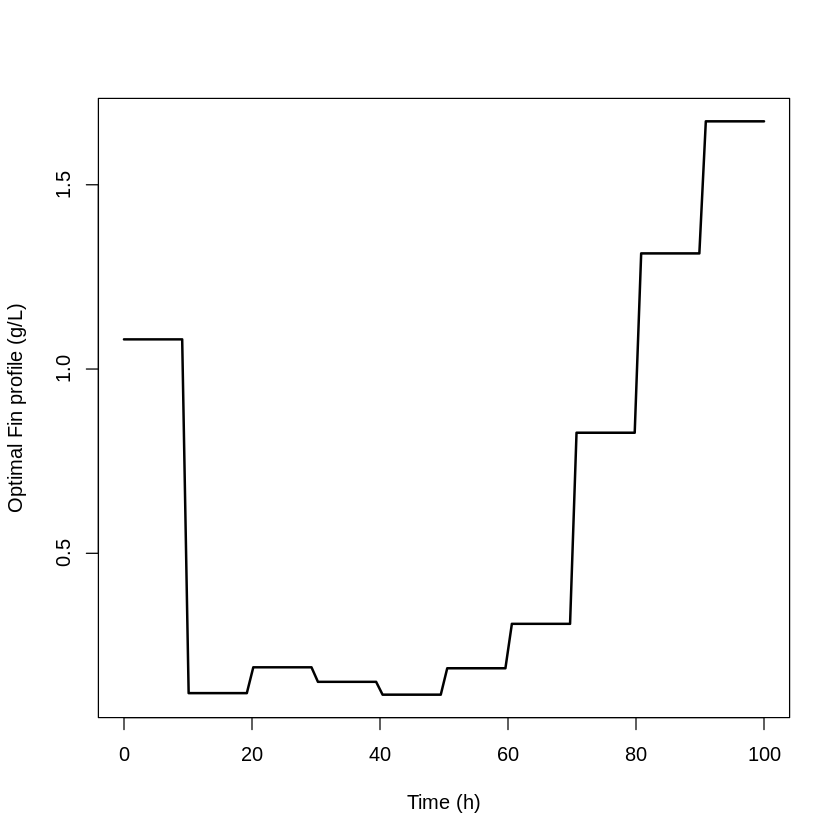

In [245]:
plot(times, Fin_opt4, type = "l", lwd = 2, ylab = "Optimal Fin profile (L/h)", xlab = "Time (h)")

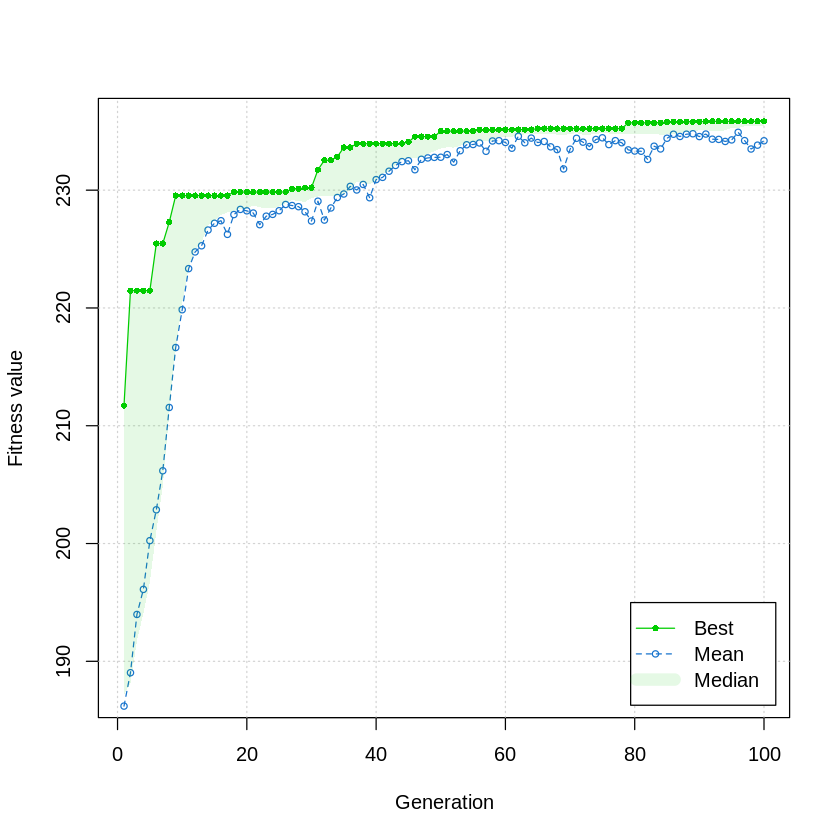

In [246]:
plot(GA4)

## Comparación entre optimización de perfil $F_{in}$ con y sin restricción de $V_{lim}$

In [247]:
# simular con el resultado de optimización sin restricción 
Fin_opt2 <- rep(GA2@solution, each = 10)
out2 <- change_input(state = s, times = times, parms = p, Fin = Fin_opt2, model = model1)
data_opt2 <- data.frame(times = out2$times, V = out2$V, x = out2$x, Fin = out2$Fin)

In [248]:
# simular con el resultado de optimización con restricción 
Fin_opt4 <- rep(GA4@solution, each = 10)
out4 <- change_input2(state = s, times = times, parms = p, Fin = Fin_opt4, model = model2)
data_opt4 <- data.frame(times = out4$times, V = out4$V, x = out4$x,  Fin = out4$Fin)

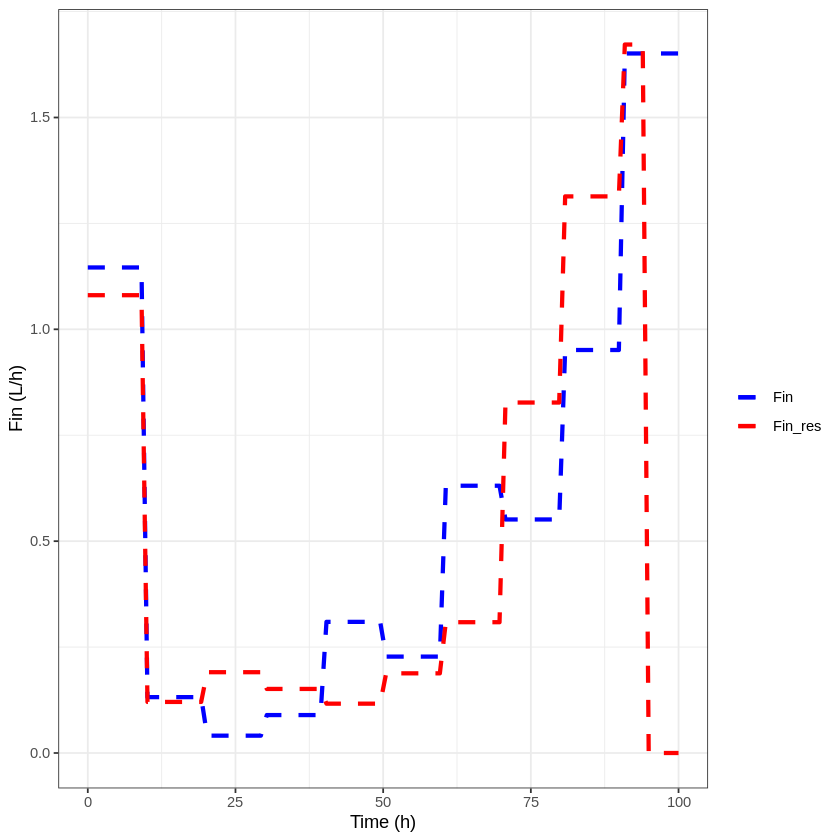

In [249]:
# mostrar resultados 
ggplot(data_opt2, aes(times)) +
        geom_line(aes(y = Fin, color = "Fin"), lty = 2, lwd = 1.2) +
        geom_line(data = data_opt4, aes(y = Fin, color = "Fin_res"), lty = 2, lwd = 1.2) +
        scale_color_manual("", breaks = c("Fin", "Fin_res"), values = c("blue", "red")) +
        xlab("Time (h)") +
        ylab("Fin (L/h)") +
        theme_bw()

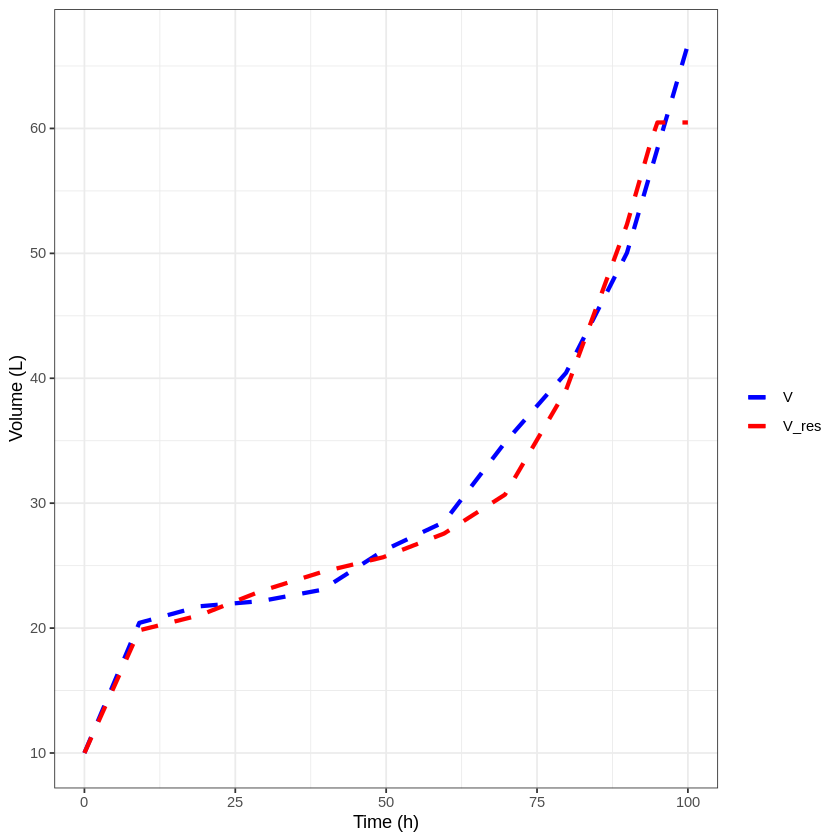

In [250]:
ggplot(data_opt2, aes(times)) +
        geom_line(aes(y=V, color = "V"), lty = 2, lwd = 1.2) +
        geom_line(data = data_opt4,aes(y=V, color = "V_res"), lty = 2, lwd = 1.2) +
        scale_color_manual("", breaks = c("V","V_res"), values = c("blue","red")) +
        xlab("Time (h)") +
        ylab("Volume (L)") +
        theme_bw()

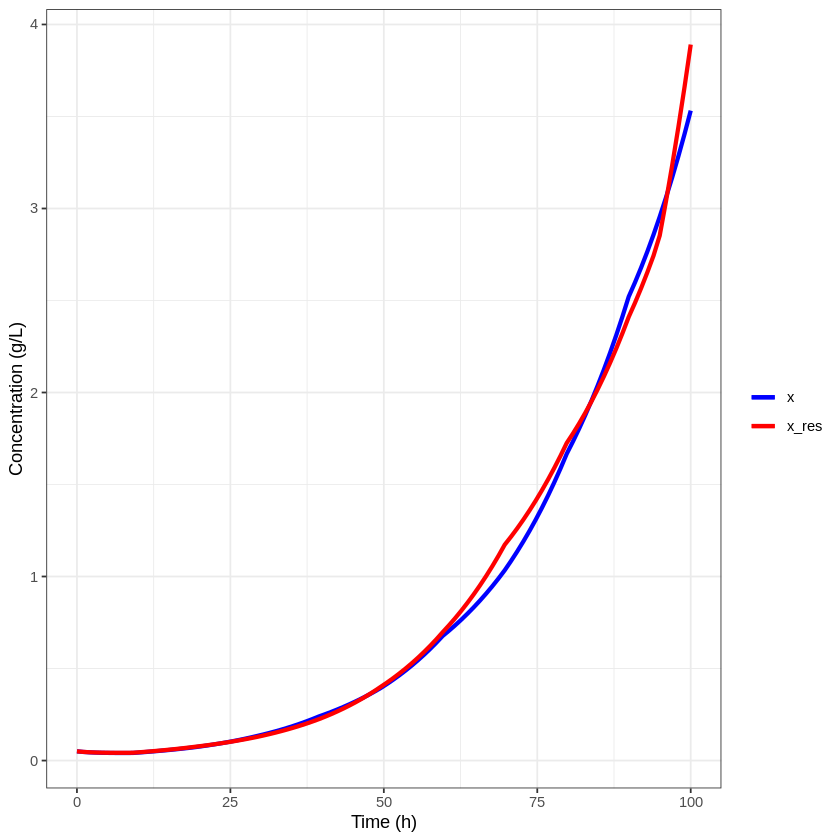

In [251]:
ggplot(data_opt2, aes(times)) +
        geom_line(aes(y=x, color = "x"), lty = 1, lwd = 1.2) +
        geom_line(data = data_opt4, aes(y=x, color = "x_res"), lty = 1, lwd = 1.2) +
        scale_color_manual("", breaks = c("x","x_res"), values = c("blue","red")) +
        xlab("Time (h)") +
        ylab("Concentration (g/L)") +
        theme_bw()

Tabla 2. Resultados obtenidos con cada uno de las estrategias de optimización

 | estrategia | $F_{in}$ óptimo | $m_{x}$ generado |
| :------- | :----: | :----:|
| $F_{in}$ constante, sin restricción | 212.6873 g | 0.461 L/h 
| $F_{in}$ variable, sin restricción | 235.627 g | perfil
| $F_{in}$ constante, con restricción | 212.6853 g | 0.460 L/h
| $F_{in}$ variable, cpn restricción | 235.8425 g| perfil

In [252]:
cat("Fin constante, sin restricción: ", "mx = ",GA1@fitnessValue, "g \n")
cat("Fin variable, sin restricción: ", "mx = ",GA2@fitnessValue, "g \n")
cat("Fin constante, con restricción: ", "mx = ",GA3@fitnessValue, "g \n")
cat("Fin variable, con restricción: ", "mx = ",GA4@fitnessValue, "g ")

Fin constante, sin restricción:  mx =  212.6873 g 
Fin variable, sin restricción:  mx =  235.627 g 
Fin constante, con restricción:  mx =  212.6853 g 
Fin variable, con restricción:  mx =  235.8425 g 

In [254]:
cat("Fin constante, sin restricción: ", "Fin = ",GA1@solution, " L/h \n")
cat("Fin constante, con restricción: ", "Fin = ",GA3@solution, "L/h ") p

mu_max     ks    Yxs    Ypx     sf    Fin     ki     Vl 
   1.2  280.0    0.2    4.0   50.0    1.2    0.3   60.0

# Conclusiones 

Vemos que la optimización con un $F_{in}$ variable genera una mayor producción de biomasa que con un valor constante, independientemente de que se consideren restricciones o no. Esto tiene sentido ya que, como se comentó anteriormente, las necesidad que consumir sustrato por parte de los microorganismos va a cambiar a lo largo de la fermentación

\\
Mientras que la decisión de mantener un flujo constante o variarlo tiene un gran impacto en la cantidad final de biomasa producida, la restricción de una capacidad máxima de volumen no parece tener un gran impacto. Sin embargo, hay que considerar que solo se utilizó un valor para el volumen límite, 60 L, y problamente un volumen límite diferente arroje resultados diferentes (de hecho así es) 

\\
Los parámetros $s_f$ y $k_i$ determinan en gran medida la "forma" de la función objetivo, por lo tanto es important tener presente estos valores al momento de realizar la optimización, ya que modificar un poco estos parámetros podría cambiar drásticamente los resultados (de hecho así es)

\\
Vemos que el proceso de optimizar un biorreactor tipo lote-alimentado resulta una tarea laboriosa que requiere una gran cantidad de cálculos y poder computacional. Además, los resultados obtenidos son factibles solo para el conjunto de parámetros que se han empleado durante el análisis. Por lo anterior, resulta conveniente automatizar este análisis mediante el desarrollo de una página web. Esto es un trabajo que ya hemos realizado y puedes acceder a esta página mediante el siguiente link. 

https://juanmgg.shinyapps.io/OPTIMIZATION/

Diviertete :)